## Home assignement

### Time series data visualization

**Task**: to depict the overall pricing behaviour of retailers (not grouped, see [Requested results 2]()) in various categories and produce conditional descriptive statistics for meaningful interpretation of for
instance the price dispersion and trajectories. <br>
```
What can be said of the price dispersion in these categories, and are there other notable trends?
```
*Hint: visually present the descriptive statistics using the ggplot2 package in R*

In [1]:
install.packages("data.table")
install.packages("psych")
install.packages("dplyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘tmvnsim’, ‘mnormt’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [5]:
library(data.table)


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last




In [ ]:
# LOAD DATA ################################################
# creating a dataframe from the pricing dataset
#data_pricing <- read.csv("home_assignment_data_pricing.csv")

data_pricing <- fread("home_assignment_data_pricing.csv")

## Explore the dataframe

In [ ]:
# EXPLORE DATA ################################################
# Using head or tail to look at part of it, 6 first lines by default
# here the first 3 lines

tail(data_pricing,3)

product_id date       category   price weekday  week store_id year month
1 969989     2016-05-12 Headphones 656   Thursday 19   4819     2016 May  
2 969989     2016-05-12 Headphones 547   Thursday 19   1260     2016 May  
3 969989     2016-05-12 Headphones 394   Thursday 19   2380     2016 May  
  cpi_adjusted_price log_of_cpi_adjusted_price
1 663.3025           6.497231                 
2 553.0891           6.315519                 
3 398.3859           5.987421                 
  number_of_store_per_product_and_day total_days_for_product
1 20                                  19403                 
2 20                                  19403                 
3 20                                  19403                 
  total_products_in_category
1 987                       
2 987                       
3  98

In [ ]:
# Check the dimension, nrow x ncol
# 2612522 rows and 14 columns
dim(data_pricing)

[1] 2612522      14

In [ ]:
# Let's look for missing values, if any
colSums(is.na(data_pricing))

product_id                                date 
                                  0                                   0 
                           category                               price 
                                  0                                   0 
                            weekday                                week 
                                  0                                   0 
                           store_id                                year 
                                  0                                   0 
                    month_numerical                  cpi_adjusted_price 
                                  0                                   0 
          log_of_cpi_adjusted_price number_of_store_per_product_and_day 
                                  0                                   0 
             total_days_for_product          total_products_in_category 
                                  0                                   0

In [ ]:
# EXAMINE RESULTS ##########################################
# Check datatype of dataframe columns
str(data_pricing)

ERROR: ignored

In [ ]:
summary(data_pricing)

   product_id           date              category             price      
 Min.   :  13189   Min.   :2012-01-01   Length:2612522     Min.   :   19  
 1st Qu.: 164639   1st Qu.:2015-03-29   Class :character   1st Qu.:  252  
 Median : 541262   Median :2016-04-01   Mode  :character   Median :  661  
 Mean   : 929360   Mean   :2015-11-08                      Mean   : 1941  
 3rd Qu.: 951367   3rd Qu.:2016-10-17                      3rd Qu.: 2585  
 Max.   :3897064   Max.   :2017-02-25                      Max.   :21100  
   weekday               week          store_id          year     
 Length:2612522     Min.   : 1.00   Min.   :    1   Min.   :2012  
 Class :character   1st Qu.:11.00   1st Qu.:  658   1st Qu.:2015  
 Mode  :character   Median :28.00   Median : 2714   Median :2016  
                    Mean   :26.88   Mean   : 5822   Mean   :2015  
                    3rd Qu.:42.00   3rd Qu.: 8744   3rd Qu.:2016  
                    Max.   :53.00   Max.   :29792   Max.   :2017  
 month

In [ ]:
#library(psych)

describe(data_pricing)


Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha


Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to max; returning -Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to max; returning -Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to max; returning -Inf”


vars n       mean         sd          
product_id                           1   2612522 9.293596e+05 1.107846e+06
date                                 2   2612522          NaN           NA
category                             3   2612522          NaN           NA
price                                4   2612522 1.940538e+03 2.801254e+03
weekday                              5   2612522          NaN           NA
week                                 6   2612522 2.687916e+01 1.625761e+01
store_id                             7   2612522 5.821576e+03 7.228734e+03
year                                 8   2612522 2.015350e+03 1.235826e+00
month_numerical                      9   2612522 6.564006e+00 3.719976e+00
cpi_adjusted_price                  10   2612522 1.962082e+03 2.830985e+03
log_of_cpi_adjusted_price           11   2612522 6.655107e+00 1.441979e+00
number_of_store_per_product_and_day 12   2612522 1.410284e+01 1.136254e+01
total_days_for_product              13   2612522 1.277926e+04 8.260182e+03
total_products_in_category          14   2612522 8.366749e+02 3.401493e+02
                                    min         max          range       
product_id                          13189.00000 3.897064e+06 3.883875e+06
date                                        Inf         -Inf         -Inf
category                                    Inf         -Inf         -Inf
price                                  19.00000 2.110000e+04 2.108100e+04
weekday                                     Inf         -Inf         -Inf
week                                    1.00000 5.300000e+01 5.200000e+01
store_id                                1.00000 2.979200e+04 2.979100e+04
year                                 2012.00000 2.017000e+03 5.000000e+00
month_numerical                         1.00000 1.200000e+01 1.100000e+01
cpi_adjusted_price                     19.32887 2.154474e+04 2.152541e+04
log_of_cpi_adjusted_price               2.96160 9.977887e+00 7.016287e+00
number_of_store_per_product_and_day     3.00000 6.900000e+01 6.600000e+01
total_days_for_product               3001.00000 3.757700e+04 3.457600e+04
total_products_in_category             67.00000 9.870000e+02 9.200000e+02
                                    se          
product_id                          6.854086e+02
date                                          NA
category                                      NA
price                               1.733095e+00
weekday                                       NA
week                                1.005835e-02
store_id                            4.472314e+00
year                                7.645878e-04
month_numerical                     2.301496e-03
cpi_adjusted_price                  1.751490e+00
log_of_cpi_adjusted_price           8.921316e-04
number_of_store_per_product_and_day 7.029842e-03
total_days_for_product              5.110456e+00
total_products_in_category          2.104455e-01

In [ ]:
# Check structure of data column
tail(data_pricing$date)

[1] "2017-02-20" "2017-02-21" "2017-02-22" "2017-02-23" "2017-02-24"
[6] "2017-02-25"

In [ ]:
str(data_pricing$date)

 IDate[1:1110820], format: "2013-01-30" "2013-01-30" "2013-01-30" "2013-01-31" "2013-01-31" ...


In [ ]:
# Check dataframe row names, here the first 10 rows
row.names(data_pricing[1:10,])

[1] "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10"

In [ ]:
# Check date class, convert into date if not already
class(data_pricing$date)

[1] "IDate" "Date"

In [ ]:
# Unify the date class all over the dataset
date <- as.Date(data_pricing$date)
tail(date,5)
class(date)

[1] "2016-05-12" "2016-05-12" "2016-05-12" "2016-05-12" "2016-05-12"

[1] "Date"

In [ ]:
# Thus no need to convert the string of dates into R 'Date' object
#sub_headphones$date <- as.Date(sub_headphones$date, "%Y-%m-%d"); head(sub_headphones$date,3)

In [ ]:
# convert month numbers to names, using a built-in constant
data_pricing$month_numerical <- factor(data_pricing$month_numerical)
levels(data_pricing$month_numerical) <- month.abb

In [ ]:
# rename month_numerical column into simply month

# out of safety, let's use another variable df for later us
# while we keep doing data manipulation with data_pricing
#df <- data.frame(data_pricing)

colnames(data_pricing)[9] <- 'month'

In [ ]:
head(data_pricing, 5)

product_id date       category   price weekday   week store_id year month
1 1030146    2013-01-30 Cellphones 1195  Wednesday 5     6852    2013 Jan  
2 1030146    2013-01-30 Cellphones 1195  Wednesday 5    11909    2013 Jan  
3 1030146    2013-01-30 Cellphones 1195  Wednesday 5    16724    2013 Jan  
4 1030146    2013-01-31 Cellphones 1195  Thursday  5     6852    2013 Jan  
5 1030146    2013-01-31 Cellphones 1195  Thursday  5    11909    2013 Jan  
  cpi_adjusted_price log_of_cpi_adjusted_price
1 1224.607           7.110375                 
2 1224.607           7.110375                 
3 1224.607           7.110375                 
4 1224.607           7.110375                 
5 1224.607           7.110375                 
  number_of_store_per_product_and_day total_days_for_product
1 3                                   4464                  
2 3                                   4464                  
3 3                                   4464                  
4 3                                   4464                  
5 3                                   4464                  
  total_products_in_category
1 67                        
2 67                        
3 67                        
4 67                        
5 67

In [2]:
# load dplyr
library(dplyr) 


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
# Identify unique category items in the dataframe
# using distinct function
distinct(data.frame(data_pricing$category))


ERROR: ignored

In [ ]:
#Headphones <- subset(data_pricing, category == "Headphones")

In [ ]:
dim(Headphones)

[1] 2185645      14

In [6]:
# Let's focus on one of these categories, Xbox 360 in my case

#library(data.table)
#xbox360 <- subset(data_pricing, category == "Xbox 360")

## Or load csv files you would have saved previously
xbox360 <- fread("xbox360.csv")

In [7]:
# remove the new index column (V1) created after saving as csv
xbox360 <- subset(xbox360[, 2:15])

tail(xbox360, 4)

product_id date       category price weekday   week store_id year month
1 3169815    2017-02-22 Xbox 360 249   Wednesday 8    1595     2017 Feb  
2 3169815    2017-02-23 Xbox 360 249   Thursday  8    1595     2017 Feb  
3 3169815    2017-02-24 Xbox 360 249   Friday    8    1595     2017 Feb  
4 3169815    2017-02-25 Xbox 360 249   Saturday  8    1595     2017 Feb  
  cpi_adjusted_price log_of_cpi_adjusted_price
1 249                5.517453                 
2 249                5.517453                 
3 249                5.517453                 
4 249                5.517453                 
  number_of_store_per_product_and_day total_days_for_product
1 8                                   3330                  
2 8                                   3330                  
3 8                                   3330                  
4 8                                   3330                  
  total_products_in_category
1 64                        
2 64                        
3 64                        
4 64

In [8]:
# Explore this category's dataframe
# check the dataframe dimensions (nrows, ncols)
# 275068 rows and 14 columns here
dim(xbox360)

[1] 275068     14

In [9]:
## Provide basic stats
summary(xbox360)

   product_id           date              category             price       
 Min.   :  43931   Min.   :2012-08-23   Length:275068      Min.   :  29.0  
 1st Qu.: 932875   1st Qu.:2015-10-29   Class :character   1st Qu.: 179.0  
 Median :1619816   Median :2016-05-21   Mode  :character   Median : 257.0  
 Mean   :1693781   Mean   :2016-03-20                      Mean   : 307.4  
 3rd Qu.:2524808   3rd Qu.:2016-10-30                      3rd Qu.: 399.0  
 Max.   :3730337   Max.   :2017-02-25                      Max.   :4062.0  
   weekday               week         store_id          year     
 Length:275068      Min.   : 1.0   Min.   :    1   Min.   :2012  
 Class :character   1st Qu.:10.0   1st Qu.:  127   1st Qu.:2015  
 Mode  :character   Median :28.0   Median :  578   Median :2016  
                    Mean   :26.7   Mean   : 4164   Mean   :2016  
                    3rd Qu.:42.0   3rd Qu.: 7088   3rd Qu.:2016  
                    Max.   :53.0   Max.   :28603   Max.   :2017  
    mo

In [10]:
library(psych)

describe(xbox360)

Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to max; returning -Inf”


vars n      mean         sd          
product_id                           1   275068 1.693781e+06 9.229935e+05
date                                 2   275068          NaN           NA
category*                            3   275068 1.000000e+00 0.000000e+00
price                                4   275068 3.074076e+02 1.741157e+02
weekday*                             5   275068 3.998033e+00 2.001152e+00
week                                 6   275068 2.669561e+01 1.649433e+01
store_id                             7   275068 4.163917e+03 6.117672e+03
year                                 8   275068 2.015719e+03 8.395034e-01
month*                               9   275068 6.397589e+00 3.401710e+00
cpi_adjusted_price                  10   275068 3.112259e+02 1.764579e+02
log_of_cpi_adjusted_price           11   275068 5.594148e+00 5.478811e-01
number_of_store_per_product_and_day 12   275068 6.733506e+00 3.302964e+00
total_days_for_product              13   275068 4.769779e+03 1.754452e+03
total_products_in_category          14   275068 6.400000e+01 0.000000e+00
                                    median       trimmed      mad         
product_id                          1.619816e+06 1.672552e+06 1.050268e+06
date                                          NA          NaN           NA
category*                           1.000000e+00 1.000000e+00 0.000000e+00
price                               2.570000e+02 2.877028e+02 1.363992e+02
weekday*                            4.000000e+00 3.997542e+00 2.965200e+00
week                                2.800000e+01 2.671679e+01 2.223900e+01
store_id                            5.780000e+02 2.991438e+03 6.908916e+02
year                                2.016000e+03 2.015768e+03 0.000000e+00
month*                              6.000000e+00 6.345253e+00 4.447800e+00
cpi_adjusted_price                  2.600000e+02 2.912444e+02 1.386702e+02
log_of_cpi_adjusted_price           5.560682e+00 5.603287e+00 5.667684e-01
number_of_store_per_product_and_day 6.000000e+00 6.283119e+00 2.965200e+00
total_days_for_product              4.092000e+03 4.492791e+03 1.129741e+03
total_products_in_category          6.400000e+01 6.400000e+01 0.000000e+00
                                    min          max          range       
product_id                          43931.000000 3.730337e+06 3.686406e+06
date                                         Inf         -Inf         -Inf
category*                               1.000000 1.000000e+00 0.000000e+00
price                                  29.000000 4.062000e+03 4.033000e+03
weekday*                                1.000000 7.000000e+00 6.000000e+00
week                                    1.000000 5.300000e+01 5.200000e+01
store_id                                1.000000 2.860300e+04 2.860200e+04
year                                 2012.000000 2.017000e+03 5.000000e+00
month*                                  1.000000 1.200000e+01 1.100000e+01
cpi_adjusted_price                     29.004536 4.179383e+03 4.150378e+03
log_of_cpi_adjusted_price               3.367452 8.337919e+00 4.970467e+00
number_of_store_per_product_and_day     3.000000 2.400000e+01 2.100000e+01
total_days_for_product               3004.000000 1.015200e+04 7.148000e+03
total_products_in_category             64.000000 6.400000e+01 0.000000e+00
                                    skew          kurtosis   se          
product_id                           0.2452755608 -0.9361981 1.759862e+03
date                                           NA         NA           NA
category*                                     NaN        NaN 0.000000e+00
price                                2.4447214481 30.9657353 3.319846e-01
weekday*                             0.0006888473 -1.2507776 3.815576e-03
week                                -0.0537234780 -1.3837414 3.144956e-02
store_id                             1.4957066629  1.2511424 1.166450e+01
year                                -0.8510242913  1.3324687 1.600672e-03
month*    

In [ ]:
# save it into a dataframe for later visualization
dsb <- describe(xbox360)

head(dsb,3)

Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to max; returning -Inf”


vars n      mean    sd       median  trimmed mad     min   max    
product_id 1    275068 1693781 922993.5 1619816 1672552 1050268 43931 3730337
date       2    275068     NaN       NA      NA     NaN      NA   Inf    -Inf
category*  3    275068       1      0.0       1       1       0     1       1
           range   skew      kurtosis   se      
product_id 3686406 0.2452756 -0.9361981 1759.862
date          -Inf        NA         NA       NA
category*        0       NaN        NaN    0.000

In [11]:
str(xbox360)

Classes ‘data.table’ and 'data.frame':	275068 obs. of  14 variables:
 $ product_id                         : int  1208489 1208489 1208489 1208489 1208489 1208489 1208489 1208489 1208489 1208489 ...
 $ date                               : IDate, format: "2015-12-04" "2015-12-05" ...
 $ category                           : chr  "Xbox 360" "Xbox 360" "Xbox 360" "Xbox 360" ...
 $ price                              : int  443 443 443 443 443 443 443 443 443 443 ...
 $ weekday                            : chr  "Friday" "Saturday" "Sunday" "Monday" ...
 $ week                               : int  49 49 49 50 50 50 50 50 50 50 ...
 $ store_id                           : int  6843 6843 6843 6843 6843 6843 6843 6843 6843 6843 ...
 $ year                               : int  2015 2015 2015 2015 2015 2015 2015 2015 2015 2015 ...
 $ month                              : chr  "Dec" "Dec" "Dec" "Dec" ...
 $ cpi_adjusted_price                 : num  451 451 451 451 451 ...
 $ log_of_cpi_adjusted_price 

In [ ]:
mean(xbox360$price)

[1] 307.4076

In [ ]:
install.packages("dataMaid")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘DEoptimR’, ‘gridExtra’, ‘pander’, ‘robustbase’, ‘whoami’




In [ ]:
# generate a summary report, in word if we prefer instead of pdf
library(dataMaid)

makeDataReport(sub_xbox360, replace=TRUE, output = "word")


ERROR: ignored

In [ ]:
#install.packages("qwarps2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘qwarps2’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


In [ ]:
#library(qwraps2)

#summary_table(xbox360)

count unique values for product_id column

In [20]:
# unique product by price

#library(dplyr)

#xbox360 %>%
#  group_by(product_id) %>%
#  summarise(count = n_distinct(price))

In [15]:
# count unique product by store
#library(dplyr)

xbox360 %>%
  group_by(product_id) %>%
  summarise(count = n_distinct(store_id))

product_id count
1    43931     9   
2   153882     8   
3   203483     9   
4   281476     9   
5   353454     7   
6   371134     9   
7   415498     8   
8   471162    12   
9   632011     7   
10  676491    10   
11  729380     4   
12  810868     6   
13  911420    24   
14  916993    17   
15  917003    13   
16  932875     8   
17  971856     8   
18 1026418    12   
19 1111457    10   
20 1135116    12   
21 1180267     8   
22 1208489    14   
23 1263856    11   
24 1273000     8   
25 1274845    13   
26 1276857     9   
27 1341635    12   
28 1372518     7   
29 1385061     9   
30 1410410     7   
⋮  ⋮          ⋮    
35 1769910    11   
36 1788218    15   
37 1837728     6   
38 1857067     9   
39 1965068    11   
40 1967331    13   
41 1980563     8   
42 2010167     6   
43 2067368     9   
44 2073626    11   
45 2348284    12   
46 2371991    14   
47 2515949    10   
48 2524808     9   
49 2608039    13   
50 2641145    18   
51 2678984    10   
52 2678994    10   
53 2687705    12   
54 2715683    15   
55 2719635    10   
56 2992616    12   
57 3096808    21   
58 3096815    16   
59 3152067    12   
60 3169815     8   
61 3186029    19   
62 3195125    12   
63 3520957    13   
64 3730337    23

In [ ]:
# source: https://stackoverflow.com/questions/28173677/how-to-count-the-number-of-unique-values-by-group
setDT(xbox360)[, (count = uniqueN(store_id)), by = product_id]


In [19]:
# or
#library(data.table) ## >= v1.9.6
# and the new column to the dataframe

setDT(xbox360)[, count := uniqueN(store_id), by = product_id]

In [22]:
# rename count column
xbox360_df = rename(xbox360, count_product_by_store = count)
# order in the new column descending order
xbox360_df = xbox360_df[order(count_product_by_store, decreasing = TRUE),]  

# we have the dataset sorted with the most common products by store at the top
head(xbox360_df,3)

product_id date       category price weekday  week store_id year month
1 911420     2016-12-23 Xbox 360 231   Friday   51   20443    2016 Dec  
2 911420     2016-12-24 Xbox 360 231   Saturday 51   20443    2016 Dec  
3 911420     2016-12-25 Xbox 360 229   Sunday   51   20443    2016 Dec  
  cpi_adjusted_price log_of_cpi_adjusted_price
1 231.0361           5.442574                 
2 231.0361           5.442574                 
3 229.0358           5.433878                 
  number_of_store_per_product_and_day total_days_for_product
1 15                                  10152                 
2 15                                  10152                 
3 15                                  10152                 
  total_products_in_category count_product_by_store
1 64                         24                    
2 64                         24                    
3 64                         24

In [23]:
#save as csv
write.csv(xbox360_df, "xbox360_df.csv")

In [24]:
#library(data.table) 

In [12]:
# select a fraction of a dataframe for quicker analysis of trends and patterns
# 30% of the whole dataframe here
#sub_xbox360 <- sample_frac(xbox360, 0.3)

sub_xbox360 <- fread("sub_xbox360.csv")

In [ ]:
head(sub_xbox360,3)

product_id date       category price weekday   week store_id year month
1 3520957    2016-07-06 Xbox 360 449   Wednesday 27   164      2016 Jul  
2 1788218    2016-02-23 Xbox 360 399   Tuesday    8   428      2016 Feb  
3 2719635    2014-12-31 Xbox 360 399   Wednesday  1   127      2014 Dec  
  cpi_adjusted_price log_of_cpi_adjusted_price
1 453.2528           6.116450                 
2 406.1001           6.006600                 
3 406.2164           6.006886                 
  number_of_store_per_product_and_day total_days_for_product
1 8                                   3141                  
2 7                                   5939                  
3 3                                   5158                  
  total_products_in_category
1 64                        
2 64                        
3 64

In [ ]:
sub_xbox360 <- subset(sub_xbox360[,2:15])

In [ ]:
dim(sub_xbox360)
# 82520 rows, 14 columns

[1] 82520    14

In [ ]:
# Convert it to a time series object.
xbox360.timeseries <- ts(sub_xbox360,start = c(2013,2018),frequency = 12)

# Print the timeseries data.
head(xbox360.timeseries, 5)

product_id date  category price weekday week store_id year month
[1,] 3520957    16988 1        449   7       27    164     2016  6   
[2,] 1788218    16854 1        399   6        8    428     2016  4   
[3,] 2719635    16435 1        399   7        1    127     2014  3   
[4,] 1341635    15991 1        599   4       41    164     2013 11   
[5,] 3096808    17219 1        849   7        8   3303     2017  4   
     cpi_adjusted_price log_of_cpi_adjusted_price
[1,] 453.2528           6.116450                 
[2,] 406.1001           6.006600                 
[3,] 406.2164           6.006886                 
[4,] 609.1548           6.412072                 
[5,] 849.0000           6.744059                 
     number_of_store_per_product_and_day total_days_for_product
[1,]  8                                  3141                  
[2,]  7                                  5939                  
[3,]  3                                  5158                  
[4,]  3                                  8106                  
[5,] 21                                  4640                  
     total_products_in_category
[1,] 64                        
[2,] 64                        
[3,] 64                        
[4,] 64                        
[5,] 64

In [ ]:
head(xbox360.timeseries[, 1:10], 10)

product_id date  category price weekday week store_id year month
 [1,] 3520957    16988 1        449   7       27     164    2016  6   
 [2,] 1788218    16854 1        399   6        8     428    2016  4   
 [3,] 2719635    16435 1        399   7        1     127    2014  3   
 [4,] 1341635    15991 1        599   4       41     164    2013 11   
 [5,] 3096808    17219 1        849   7        8    3303    2017  4   
 [6,]  911420    17197 1        238   6        5    2354    2017  5   
 [7,] 1619816    17017 1        409   5       31   12377    2016  2   
 [8,] 1274845    17029 1        223   6       33   18761    2016  2   
 [9,]   43931    17138 1        149   3       48      32    2016  3   
[10,] 2992616    16925 1        349   7       18     578    2016  9   
      cpi_adjusted_price
 [1,] 453.2528          
 [2,] 406.1001          
 [3,] 406.2164          
 [4,] 609.1548          
 [5,] 849.0000          
 [6,] 239.6716          
 [7,] 413.3307          
 [8,] 225.3612          
 [9,] 149.0233          
[10,] 352.8850

In [ ]:
write.csv(xbox360.timeseries, "xbox360_timeseries.csv")

In [ ]:
df_ts <- as.data.frame(xbox360.timeseries)

samp_xbox360.ts <- sample_frac(df_ts, 0.3)

In [ ]:
tail(df_ts, 3)

product_id date  category price weekday week store_id year month
82518 1263856    16549 1        249   1       17   13676    2015 1    
82519 3169815    17030 1        249   7       33     428    2016 2    
82520  676491    16459 1        399   3        4     112    2015 5    
      cpi_adjusted_price log_of_cpi_adjusted_price
82518 254.2239           5.538216                 
82519 251.6365           5.527986                 
82520 410.5302           6.017450                 
      number_of_store_per_product_and_day total_days_for_product
82518 3                                   3729                  
82519 6                                   3330                  
82520 4                                   7035                  
      total_products_in_category
82518 64                        
82519 64                        
82520 64

In [ ]:
print(xbox360.timeseries[, 1:10])

         product_id  date category price weekday week store_id year month
Feb 2181    3520957 16988        1   449       7   27      164 2016     6
Mar 2181    1788218 16854        1   399       6    8      428 2016     4
Apr 2181    2719635 16435        1   399       7    1      127 2014     3
May 2181    1341635 15991        1   599       4   41      164 2013    11
Jun 2181    3096808 17219        1   849       7    8     3303 2017     4
Jul 2181     911420 17197        1   238       6    5     2354 2017     5
Aug 2181    1619816 17017        1   409       5   31    12377 2016     2
Sep 2181    1274845 17029        1   223       6   33    18761 2016     2
Oct 2181      43931 17138        1   149       3   48       32 2016     3
Nov 2181    2992616 16925        1   349       7   18      578 2016     9
Dec 2181    1769910 16793        1   419       5   52      578 2015     3
Jan 2182    2719635 16759        1   199       1   47      112 2015    10
Feb 2182    1619816 16953        1   4

In [ ]:
library(ggplot2)

In [ ]:
str(xbox360.timeseries)

 Time-Series [1:82520, 1:14] from 2181 to 9058: 3520957 1788218 2719635 1341635 3096808 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:14] "product_id" "date" "category" "price" ...


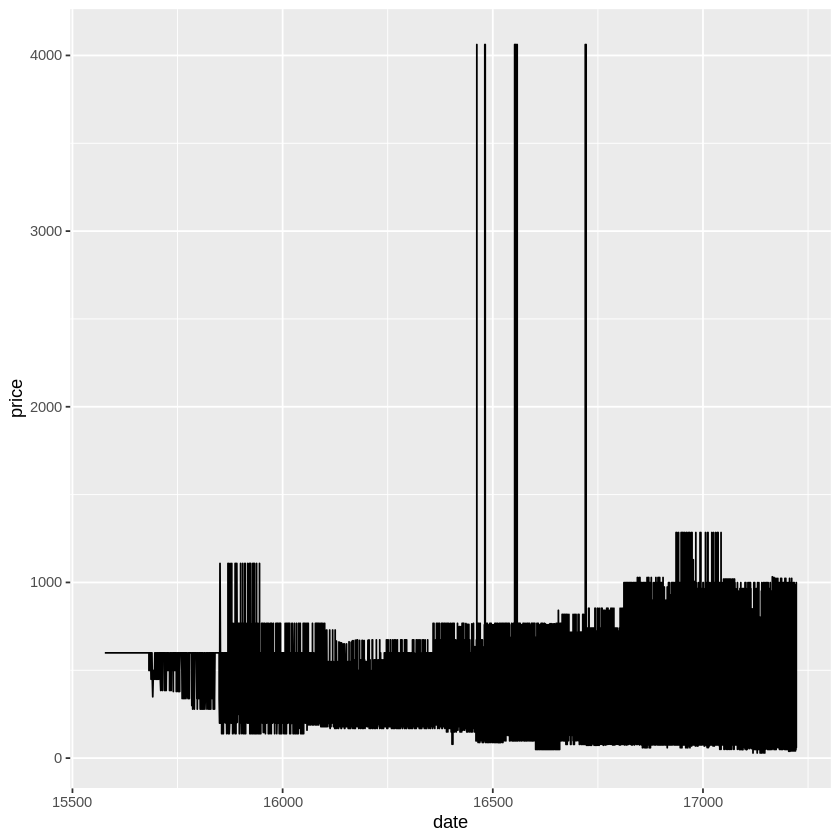

In [ ]:
p0 <- ggplot(df_ts, aes( x = date, y =price))

p0 + geom_line()

#+ geom_point() +
#      labs(title = "xbpx360 time series")

ERROR: ignored

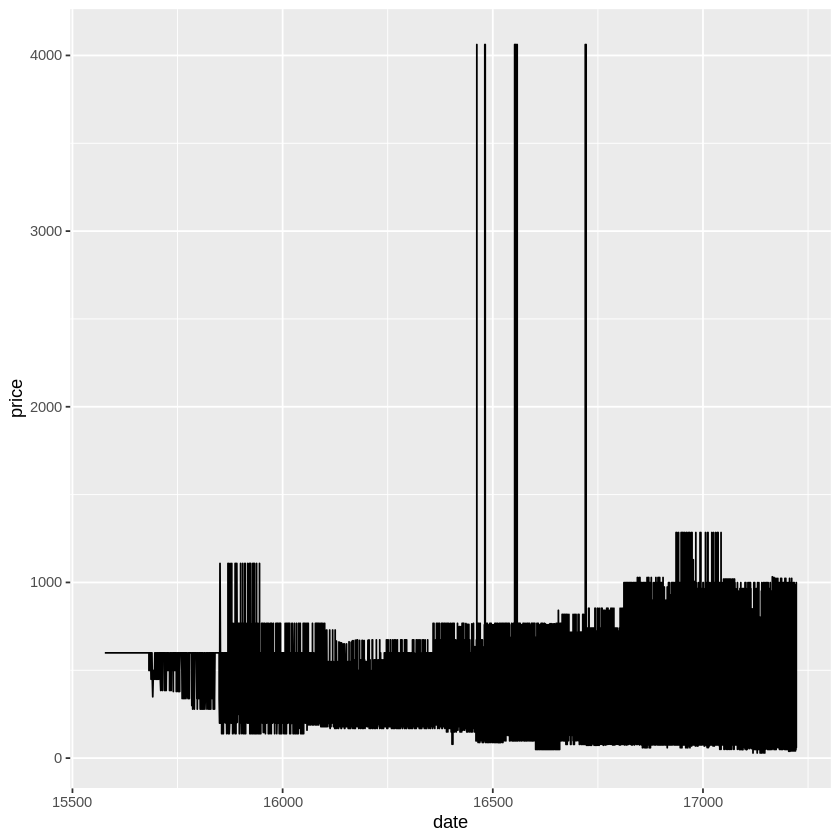

In [ ]:
p0 <- ggplot(df_ts, aes( x = date, y =price))

p0 + geom_line()
 + scale_x_continuous(limits = c(16000, 16500))

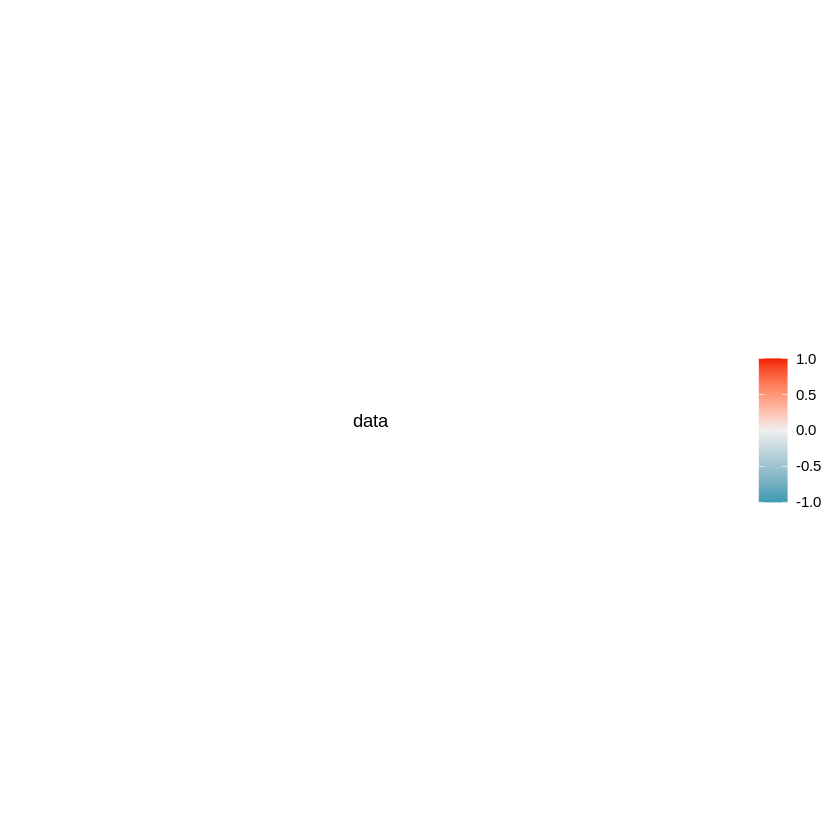

In [ ]:
library(GGally)

# Spearman correlation coefficients, using strictly complete observations
ggcorr(sub_xbox360[, which(sapply(sub_xbox360, class) == "numeric")], method = c("all.obs", "spearman"))

Warning message in ggcorr(sub_xbox360):
“data in column(s) 'date', 'category', 'weekday', 'month' are not numeric and were ignored”
Warning message in cor(data, use = method[1], method = method[2]):
“the standard deviation is zero”


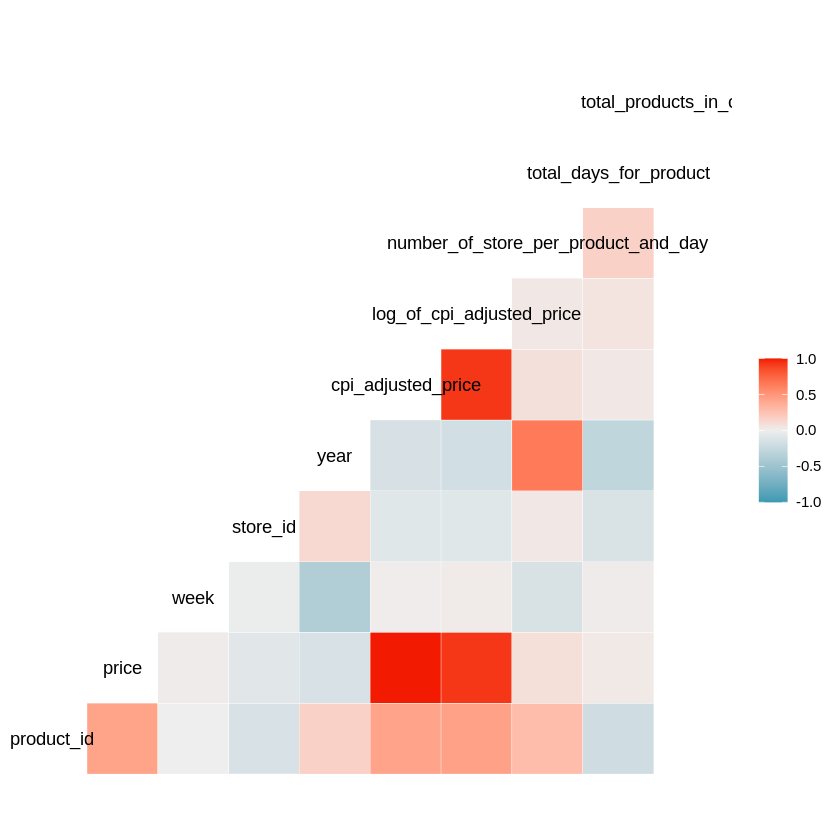

In [ ]:
library(GGally)

# Pearson correlation coefficients, using strictly complete observations
ggcorr(sub_xbox360)

In [ ]:
library(GGally)

# Spearman correlation coefficients, using strictly complete observations
ggcorr(sub_xbox360)

In [ ]:
str(sub_xbox360)

Classes ‘data.table’ and 'data.frame':	275068 obs. of  14 variables:
 $ product_id                         : int  1208489 1208489 1208489 1208489 1208489 1208489 1208489 1208489 1208489 1208489 ...
 $ date                               : IDate, format: "2015-12-04" "2015-12-05" ...
 $ category                           : chr  "Xbox 360" "Xbox 360" "Xbox 360" "Xbox 360" ...
 $ price                              : int  443 443 443 443 443 443 443 443 443 443 ...
 $ weekday                            : chr  "Friday" "Saturday" "Sunday" "Monday" ...
 $ week                               : int  49 49 49 50 50 50 50 50 50 50 ...
 $ store_id                           : int  6843 6843 6843 6843 6843 6843 6843 6843 6843 6843 ...
 $ year                               : int  2015 2015 2015 2015 2015 2015 2015 2015 2015 2015 ...
 $ month                              : chr  "Dec" "Dec" "Dec" "Dec" ...
 $ cpi_adjusted_price                 : num  451 451 451 451 451 ...
 $ log_of_cpi_adjusted_price 

In [ ]:
# Quick visualization to have a feel of the data
#plot(xbox360) # takes too long to load for 275068 rows

# Thus let's split the dataset into training and tesing data
# Install needed packages
install.packages("caTools")

library(caTools)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘bitops’




In [ ]:
mean(sub_xbox360$price)

[1] 307.1361

In [ ]:

set.seed(123) # to shuffle the data in a way defined by the seed value
# so that we always have the same dataset everytime seeding data
# as we always have the same random number generated

sample_xbox360 = sample.split(sub_xbox360, SplitRatio = .70) 
# splits the data in the ratio mentioned in SplitRatio. 


In [ ]:
# After splitting marks  # these rows as logical TRUE
# and the remaining are marked as logical FALSE
train1 =subset(sub_xbox360,sample_xbox360 ==TRUE) # creates a training dataset named train1 with rows which are marked as TRUE
test1=subset(sub_xbox360, sample_xbox360 ==FALSE)

ERROR: ignored

In [ ]:
# After splitting marks these rows as logical TRUE
# and the remaining are marked as logical FALSE
train_xbox360 = subset(sub_xbox360, sample_xbox360 == TRUE)
# creates a training dataset named train1 with rows which are marked as TRUE

test_xbox360 = subset(sub_xbox360, sample_xbox360 == FALSE)


ERROR: ignored

In [ ]:
install.packages("data.tree")
install.packages("rpart.tool")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘rpart.tool’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


In [ ]:
library(data.tree)
library(rpart)

In [ ]:
#write.csv(train_xbox360, "train_xbox360.csv")
#write.csv(test_xbox360, "test_xbox360.csv")

In [ ]:
train_xbox360 <- fread("train_xbox360.csv")

In [ ]:
test_xbox360 <- fread("test_xbox360.csv")

In [ ]:
head(train_xbox360,3)

X product_id date       category price weekday   week store_id year month
1 1 1208489    2015-12-04 Xbox 360 443   Friday    49   6843     2015 Dec  
3 3 1208489    2015-12-06 Xbox 360 443   Sunday    49   6843     2015 Dec  
6 6 1208489    2015-12-09 Xbox 360 443   Wednesday 50   6843     2015 Dec  
  cpi_adjusted_price log_of_cpi_adjusted_price
1 450.7826           6.110985                 
3 450.7826           6.110985                 
6 450.7826           6.110985                 
  number_of_store_per_product_and_day total_days_for_product
1 6                                   7216                  
3 6                                   7216                  
6 6                                   7216                  
  total_products_in_category
1 64                        
3 64                        
6 64

In [ ]:
head(test_xbox360,3)

X product_id date       category price weekday  week store_id year month
2 2 1208489    2015-12-05 Xbox 360 443   Saturday 49   6843     2015 Dec  
4 4 1208489    2015-12-07 Xbox 360 443   Monday   50   6843     2015 Dec  
5 5 1208489    2015-12-08 Xbox 360 443   Tuesday  50   6843     2015 Dec  
  cpi_adjusted_price log_of_cpi_adjusted_price
2 450.7826           6.110985                 
4 450.7826           6.110985                 
5 450.7826           6.110985                 
  number_of_store_per_product_and_day total_days_for_product
2 6                                   7216                  
4 6                                   7216                  
5 6                                   7216                  
  total_products_in_category
2 64                        
4 64                        
5 64

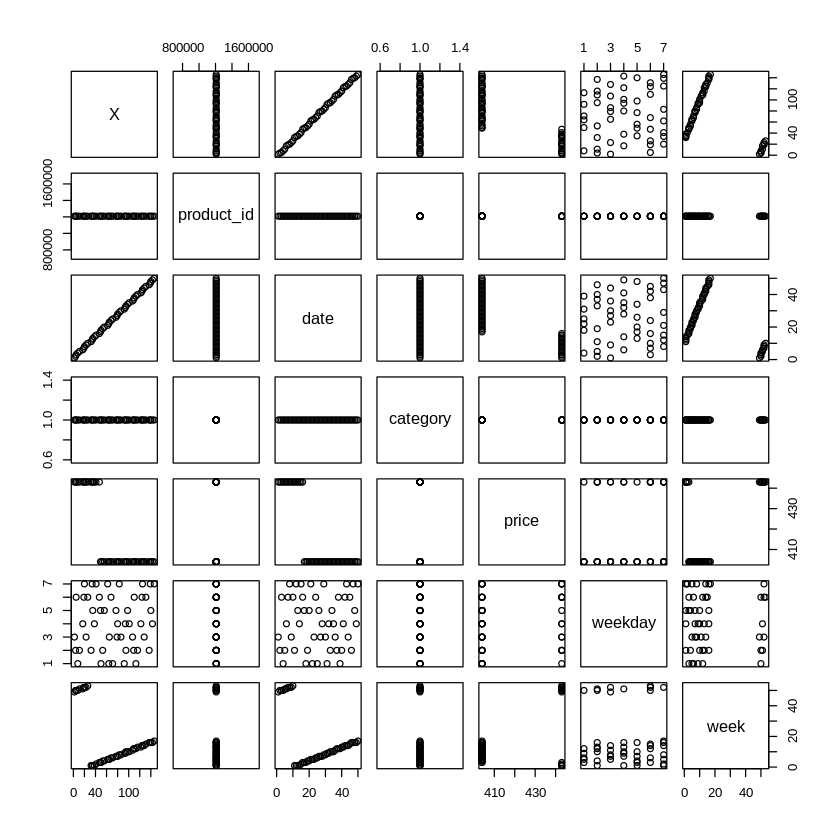

In [ ]:
# Let's now plot this data subset, here the first 50 rows & 7 columns
plot(test_xbox360[1:50, 1:7])

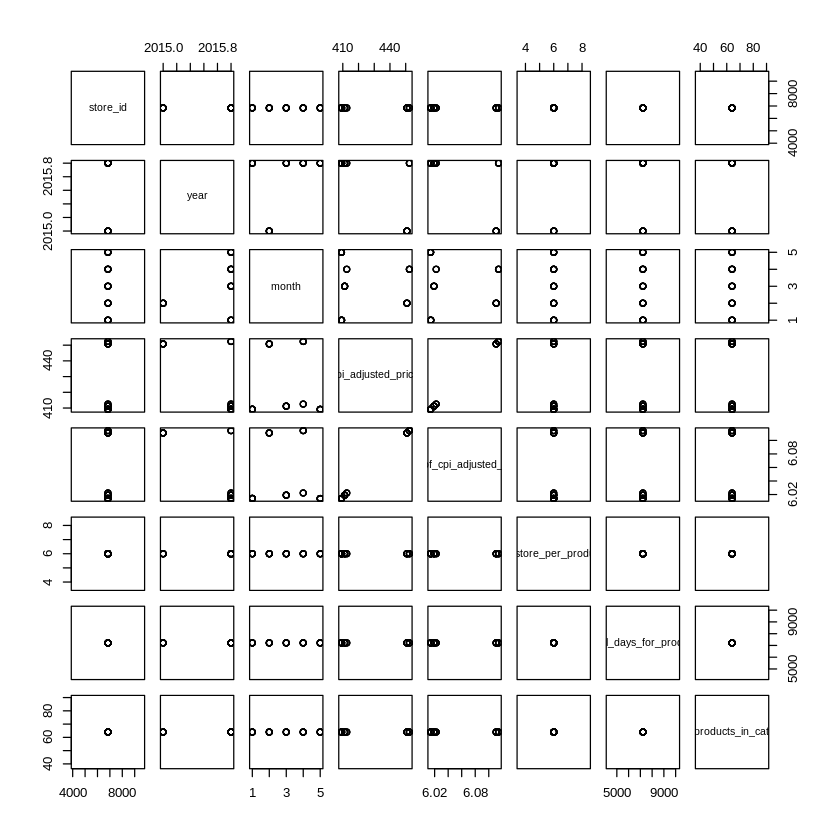

In [ ]:
# Now plot this for the following 7 columns
plot(test_xbox360[1:50, 8:15])

In [ ]:
#?geom_point(mapping = )

In [ ]:
# Save the xbox 360 dataframe as a csv file for possible later use
#write.csv(xbox360, "xbox360.csv")

In [ ]:
# Now let's subset the dataframe on columns of interest
#sub_xbox360 <- subset(xbox360, select = c("date","price","week","store_id", "year", "month"))

#tail(sub_xbox360, 4)


date       price week store_id year month
275065 2017-02-22 249   8    1595     2017 Feb  
275066 2017-02-23 249   8    1595     2017 Feb  
275067 2017-02-24 249   8    1595     2017 Feb  
275068 2017-02-25 249   8    1595     2017 Feb

In [ ]:
# Save the subset dataframe as a csv file for possible later use
write.csv(sub_xbox360, "sub_xbox360.csv")

**Explore the correlations**

In [ ]:
install.packages("GGally")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘reshape’




In [ ]:
library(GGally)

Loading required package: ggplot2

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [ ]:
# use 30% of xbox360 data frame for quick test
test_xbox360 <- fread("test_xbox360.csv")

In [ ]:
train_xbox360 <- fread("train_xbox360.csv")

In [ ]:
dim(test_xbox360)

[1] 21620    16

In [ ]:
test_xbox360 <- test_xbox360[, 3:16 ]
test_xbox360 <- data.frame(na.omit(test_xbox360))

In [ ]:
train_xbox360 <- train_xbox360[, 3:16 ]
train_xbox360 <- data.frame(na.omit(train_xbox360))

In [ ]:
tail(test_xbox360, 3)

product_id date       category price weekday  week store_id year month
21617 2687705    2016-12-22 Xbox 360 439   Thursday 51   7088     2016 Dec  
21618 2687705    2016-12-23 Xbox 360 439   Friday   51   7088     2016 Dec  
21619 2687705    2016-12-26 Xbox 360 439   Monday   52   7088     2016 Dec  
      cpi_adjusted_price log_of_cpi_adjusted_price
21617 439.0687           6.084656                 
21618 439.0687           6.084656                 
21619 439.0687           6.084656                 
      number_of_store_per_product_and_day total_days_for_product
21617 7                                   4428                  
21618 7                                   4428                  
21619 7                                   4428                  
      total_products_in_category
21617 64                        
21618 64                        
21619 64

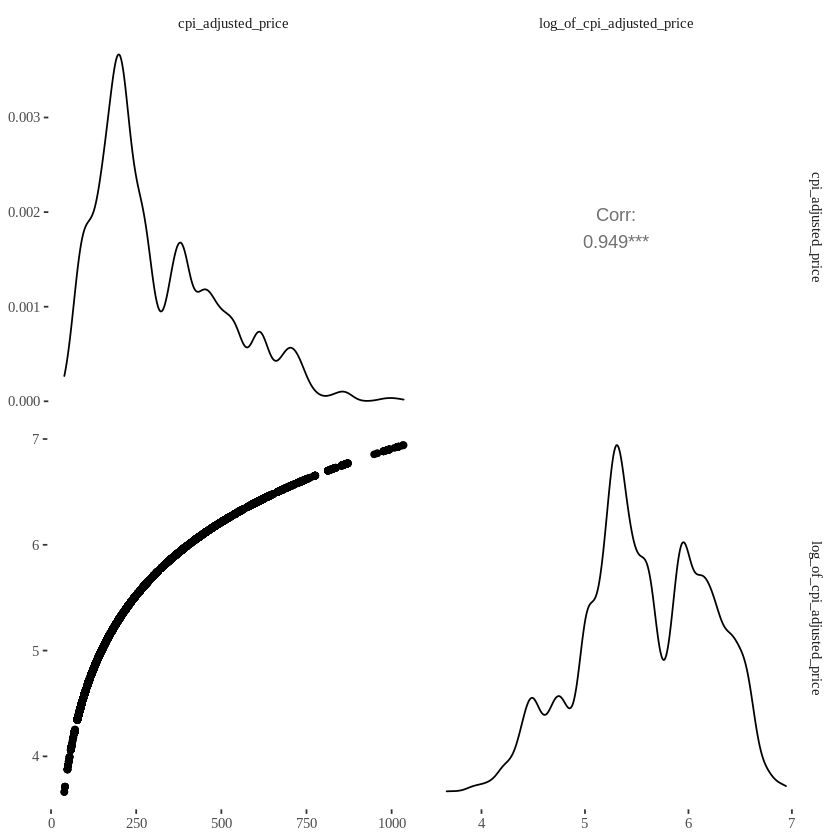

In [ ]:
#library(GGally)
# we know already that 
pair <- ggpairs(test_xbox360[, which(sapply(test_xbox360, class) == "numeric")])

pair + theme_tufte() +
ggsave("pairs.png",width=6, height=4,dpi=300)


In [ ]:
library(gridExtra)


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [ ]:
# 2 grid plots

library(ggplot2)
grid.arrange(plot01, pair, nrow = 1)

ERROR: ignored

In [ ]:

library(gridExtra)

plot01 <- plot(test_xbox360[1:50, 1:7])

pair + theme_tufte()

grid.arrange(plot01, pair, ncol=2)


In [ ]:
ggcorr(msleep[, c("sleep_total", "sleep_rem", "sleep_cycle", "awake",
"brainwt", "bodywt")])

In [ ]:
cor(sub_xbox360$price, sub_xbox360$week)

[1] 0.009373254

In [ ]:
cor(sub_xbox360$price, sub_xbox360$year)

[1] -0.1367374

In [ ]:
cor(sub_xbox360$price, sub_xbox360$number_of_store_per_product_and_day)

[1] 0.09224942

In [ ]:
cor(sub_xbox360$price, sub_xbox360$total_days_for_product)

[1] 0.03318676

In [ ]:
cor(sub_xbox360$number_of_store_per_product_and_day, sub_xbox360$total_days_for_product)

[1] 0.1655543

### Visualizations

In [ ]:
install.packages("ggplot2")
library(ggplot2)

install.packages("ggthemes")
library(ggthemes)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘ggplot2’


The following objects are masked from ‘package:psych’:

    %+%, alpha


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
#plot(sub_xbox360$year, sub_headphones$price, type = "l", xlab = "year", ylab = "price")

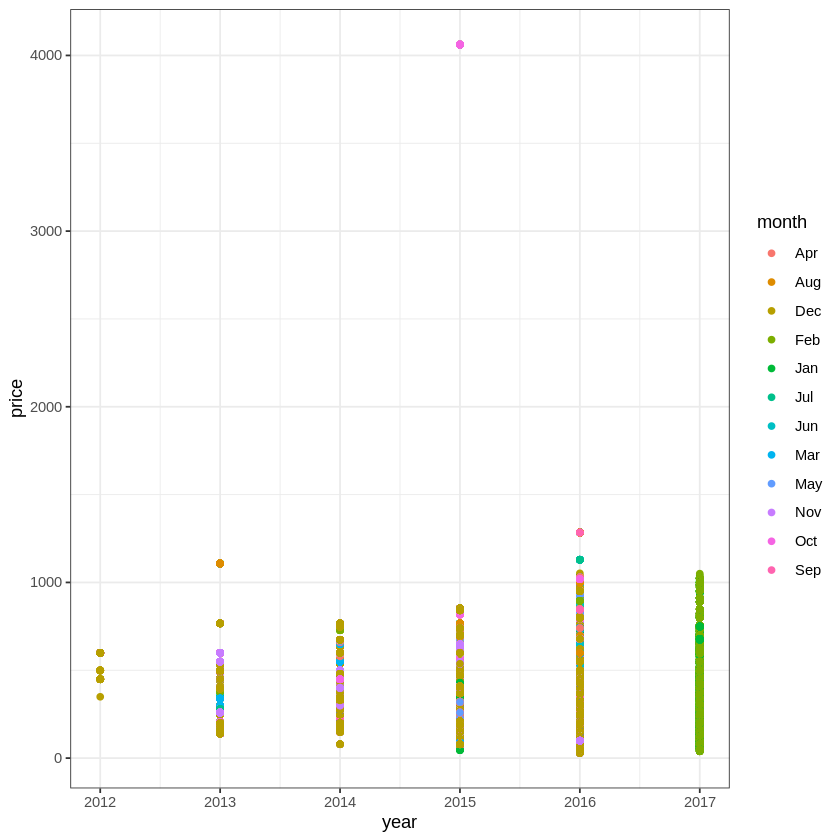

In [ ]:
# PLOTS RESULTS ##########################################
# Let's explore the data by creating a line plot of the time series dataframe
# coloured by week

plot1 <- ggplot(xbox360, aes(year, price, colour = month))

plot1 + geom_point() +
theme_bw()
#ggsave("plot1.png",width=6, height=4,dpi=300)


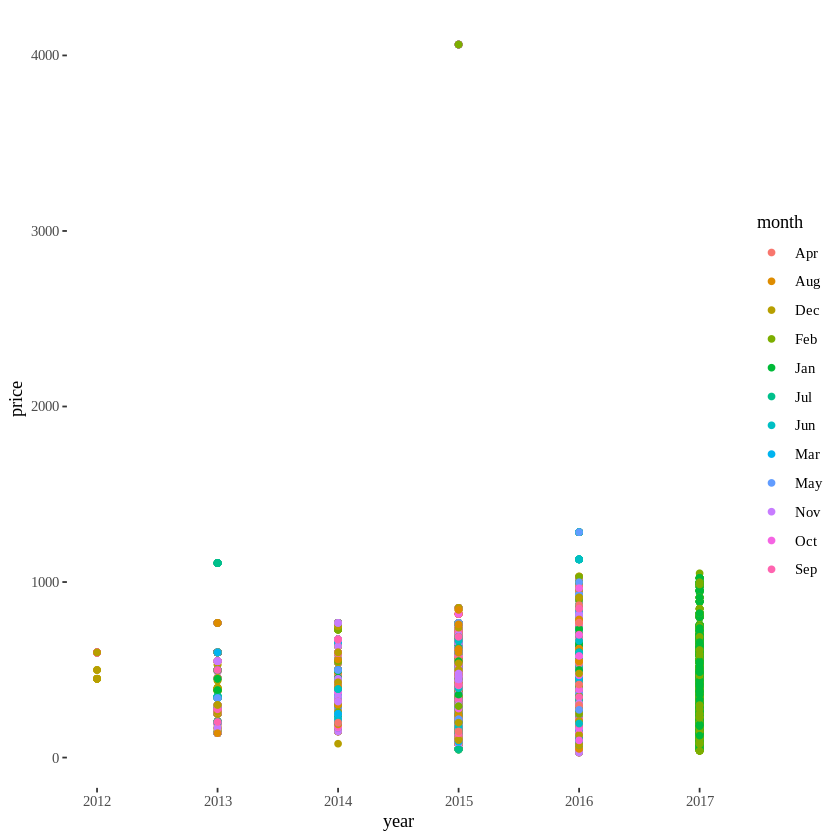

In [ ]:
# Let's use a subset of xbox360 dataframe 
# it will make the analysis and visualization faster
# while the df will be keeping the same behavious
plot1 <- ggplot(sub_xbox360, aes(year, price, colour = month))

plot1 + geom_point() +
theme_tufte() +
ggsave("plot1.png",width=6, height=4,dpi=300)


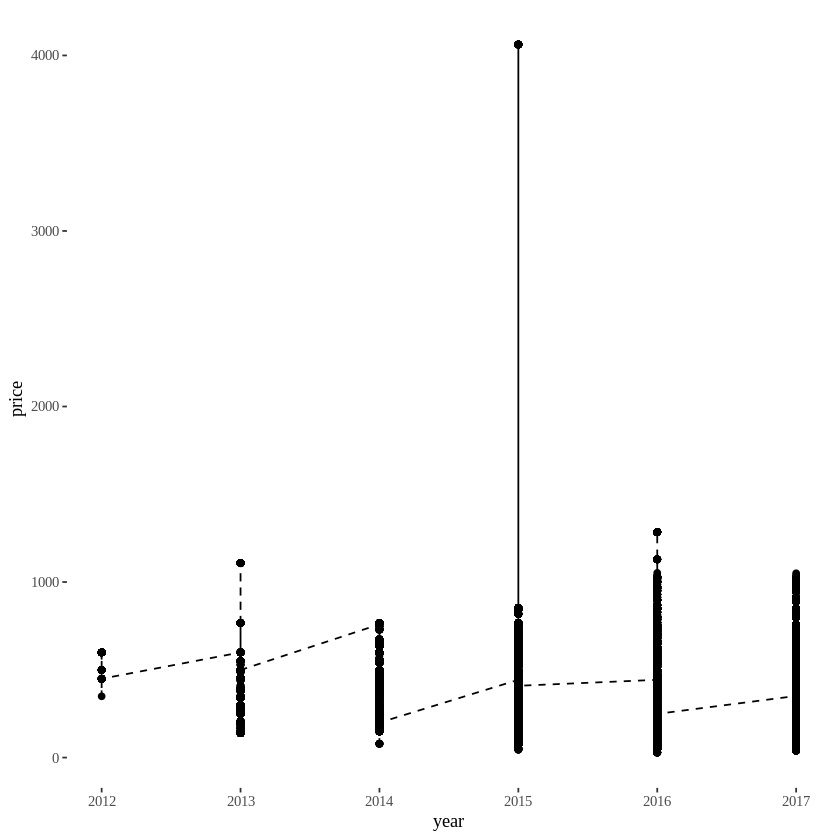

In [ ]:
plot02 <- ggplot(xbox360, aes(x = year, y = price, group = 1))

plot02 + geom_line(linetype = "dashed") +
geom_point() +
theme_tufte() +
ggsave("plot02.png",width=6, height=4,dpi=300)


In [ ]:
# Let's arrange multiple plots on the same page
install.packages("gridExtra")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



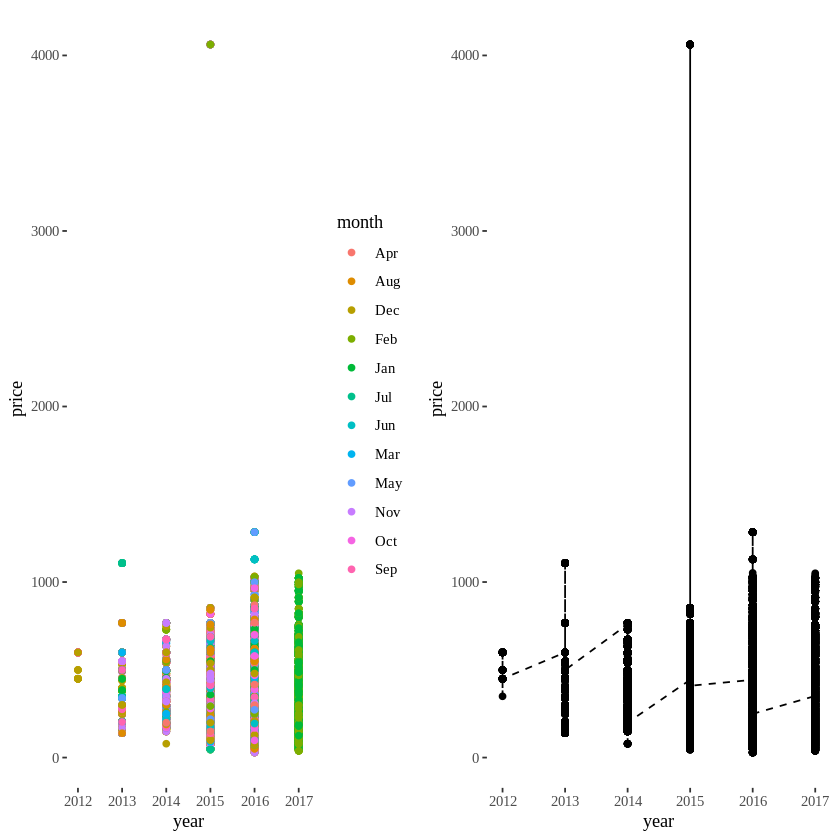

In [ ]:
library(gridExtra)

plot10 <- ggplot(sub_xbox360, aes(year, price, colour = month)) + geom_point() +
theme_tufte()

plot020 <- ggplot(xbox360, aes(x = year, y = price, group = 1)) + geom_line(linetype = "dashed") +
geom_point() +
theme_tufte()

grid.arrange(plot10, plot020, ncol=2)


In [ ]:
# As we plan to plot discrimating by store_id, currently with numerical values
# let's convert it into factor so that each id is associated with
# own color, shape or symbol as needed
sub_xbox360$store_id <- as.factor(sub_xbox360$store_id)

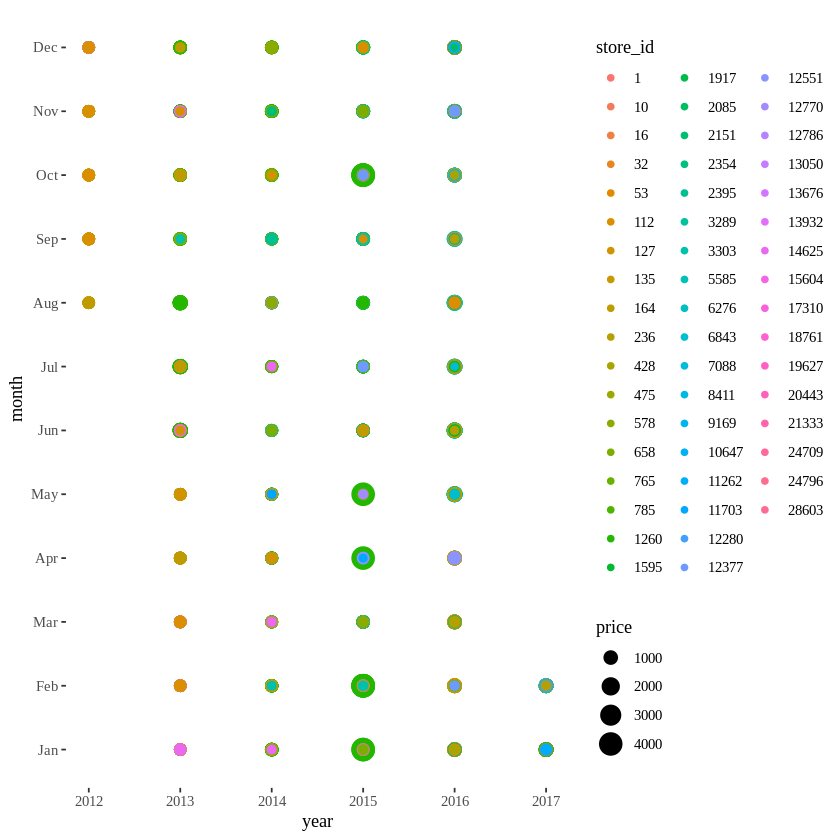

In [ ]:
plot2 <- ggplot(sub_xbox360, aes(year, month, size = price, colour = store_id))

plot2 + 
geom_point() +
scale_y_discrete(limits = month.abb) +
theme_tufte() +
ggsave("plot2.png",width=6, height=4,dpi=300)


In [ ]:
tail(sub_xbox360, 3)

product_id date       category price weekday  week store_id year month
1 1682240    2016-10-15 Xbox 360  98   Saturday 41   428      2016 Oct  
2 1619816    2017-01-15 Xbox 360 499   Sunday    2   11262    2017 Jan  
3 3186029    2016-04-19 Xbox 360 769   Tuesday  16   12551    2016 Apr  
  cpi_adjusted_price log_of_cpi_adjusted_price
1  98.53314          4.590393                 
2 502.50479          6.219605                 
3 778.96455          6.657966                 
  number_of_store_per_product_and_day total_days_for_product
1 7                                   3546                  
2 7                                   4837                  
3 9                                   5274                  
  total_products_in_category
1 64                        
2 64                        
3 64

In [ ]:
sub_xbox360_ordered <- sub_xbox360[order(month),]

tail(sub_xbox360_ordered, 3)

product_id date       category price weekday   week store_id year month
1  281476    2016-09-26 Xbox 360 137   Monday    39   236      2016 Sep  
2  371134    2015-09-09 Xbox 360 139   Wednesday 37   112      2015 Sep  
3 1837728    2016-09-20 Xbox 360 189   Tuesday   38   236      2016 Sep  
  cpi_adjusted_price log_of_cpi_adjusted_price
1 138.2191           4.928840                 
2 141.5095           4.952367                 
3 190.6818           5.250606                 
  number_of_store_per_product_and_day total_days_for_product
1 7                                   3833                  
2 3                                   3622                  
3 5                                   3609                  
  total_products_in_category
1 64                        
2 64                        
3 64

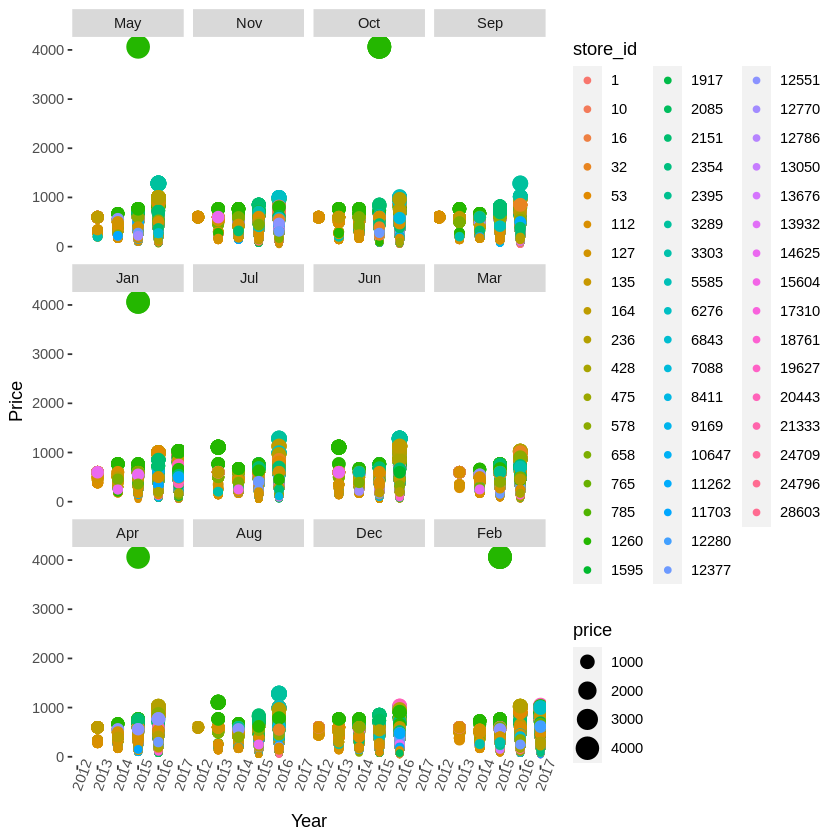

In [ ]:
# Create scatter Plot
plot3 <- ggplot(sub_xbox360 , aes(x = year , y = price))

plot3 +
       geom_point(aes(color = store_id, size = price)) +
       facet_wrap(~month, shrink = TRUE, as.table = FALSE,) +
       ylab("Price") + 
       xlab("Year") +
       theme(
         panel.background = element_rect(fill = "transparent"), # bg of the panel
         plot.background = element_rect(fill = "transparent", color = NA), # bg of the plot
         panel.grid.major = element_blank(), # get rid of major grid
         panel.grid.minor = element_blank(), # get rid of minor grid
         #legend.background = element_rect(fill = "transparent"), # get rid of legend bg
         #legend.box.background = element_rect(fill = "transparent"), # get rid of legend panel bg
         axis.text.x = element_text(angle = 70)
         ) +
       ggsave("plot3.png",width=6, height=4,dpi=300)
       
# Run and display plot


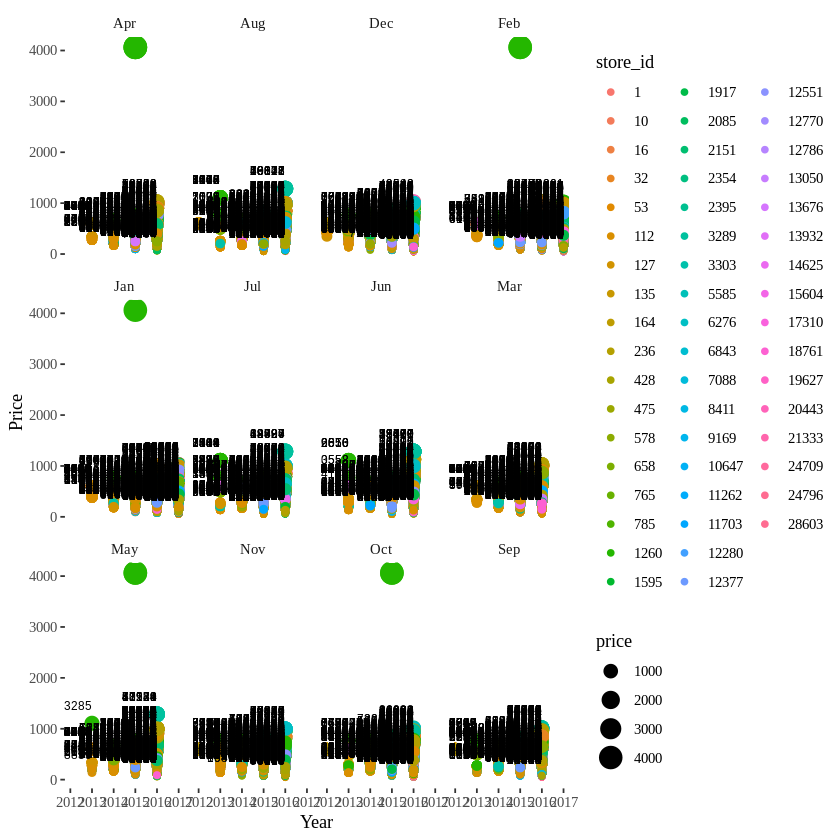

In [ ]:
# Create scatter Plot
plot3 <- ggplot(sub_xbox360 , aes(x = year , y = price))

plot3 +
       geom_point(aes(color = store_id, size = price)) +
       facet_wrap(~month) +
       #geom_text( aes(label = row.names(sub_xbox360)) , hjust = 1 , vjust = -1.5 ,size = 2.5 ) +
       ylab("Price") + 
       xlab("Year") +
       theme_tufte() +
       ggsave("plot3.png",width=6, height=4,dpi=300)
       
# Run and display plot


We identify already here a few data points outliers over a few months. Let's explore it a bit further later on.

There seeems to be outliers price wise above 4000, most of which being priced below 1500.<br>
Let's use box plot to illustrate it better.

In [ ]:
# Let's also attempt to label data including outliers
# in order to identify relevant related information such as store_id
bxp1 <- ggplot(sub_xbox360, aes(x = year, y = price, group = 1))

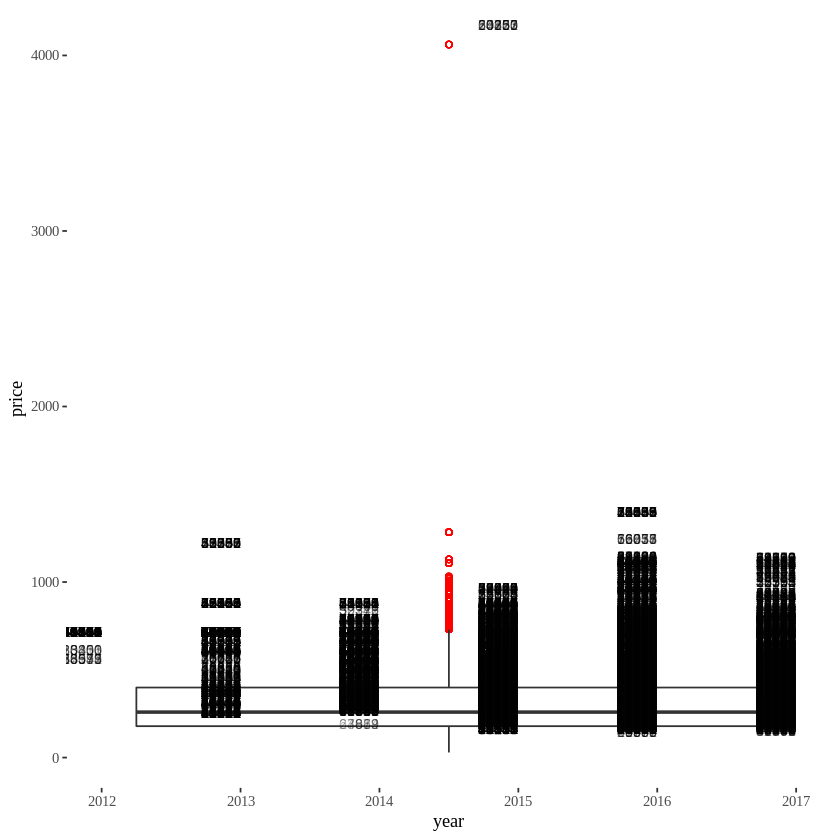

In [ ]:
bxp1 +
geom_boxplot(outlier.colour = "red", outlier.shape = 1) +
geom_text( aes(label = row.names(sub_xbox360)) , hjust = 1 , vjust = -1.5 ,size = 3, alpha = 0.3 ) +
theme_tufte() +
ggsave("bxp1.png",width=6, height=4,dpi=300)

Let's visualize the distribution of the data by combining box and violin plots for better visualization of the outliers. To justify possibly to dismiss them if their effect is not significant.

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”


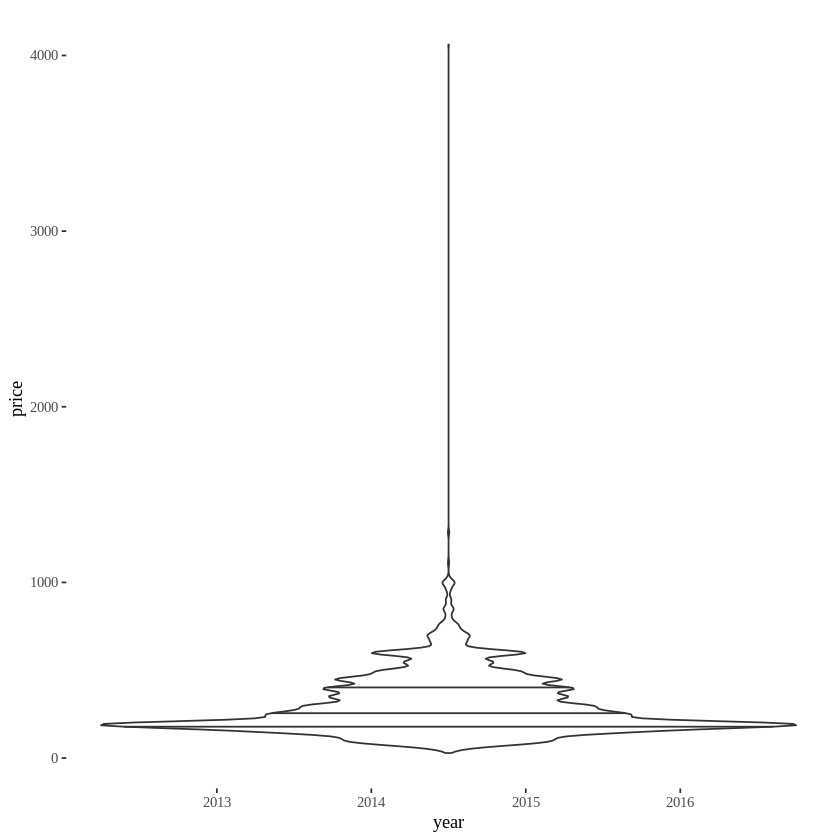

In [ ]:
vp1 <- ggplot(sub_xbox360, aes(x = year, y = price))

# add horizontal lines at Q1, Q2, and Q3
vp1 + 
geom_violin(draw_quantiles = c(0.25, 0.5, 0.75)) +
#geom_boxplot(outlier.colour = "red", outlier.shape = 1) +
#ggtitle("Violin plot") +
theme_tufte() +
ggsave("vp1.png",width=6, height=4,dpi=300)

Warning message:
“Continuous x aesthetic -- did you forget aes(group=...)?”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message:
“Continuous x aesthetic -- did you forget aes(group=...)?”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”


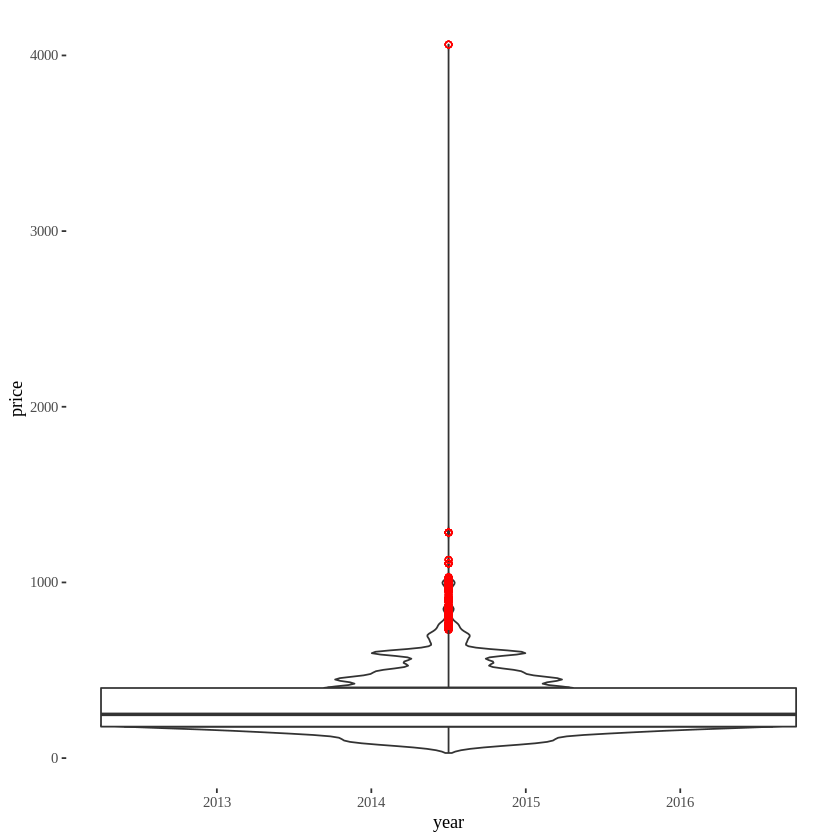

In [ ]:
# combine box and violin plots with outliers highlighted
vp1 + 
geom_violin(draw_quantiles = c(0.25, 0.5, 0.75)) +
geom_boxplot(outlier.colour = "red", outlier.shape = 1) +
#ggtitle("Violin plot") +
theme_tufte() +
ggsave("vp2.png",width=6, height=4,dpi=300)

Warning message:
“Removed 11 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 11 rows containing non-finite values (stat_boxplot).”


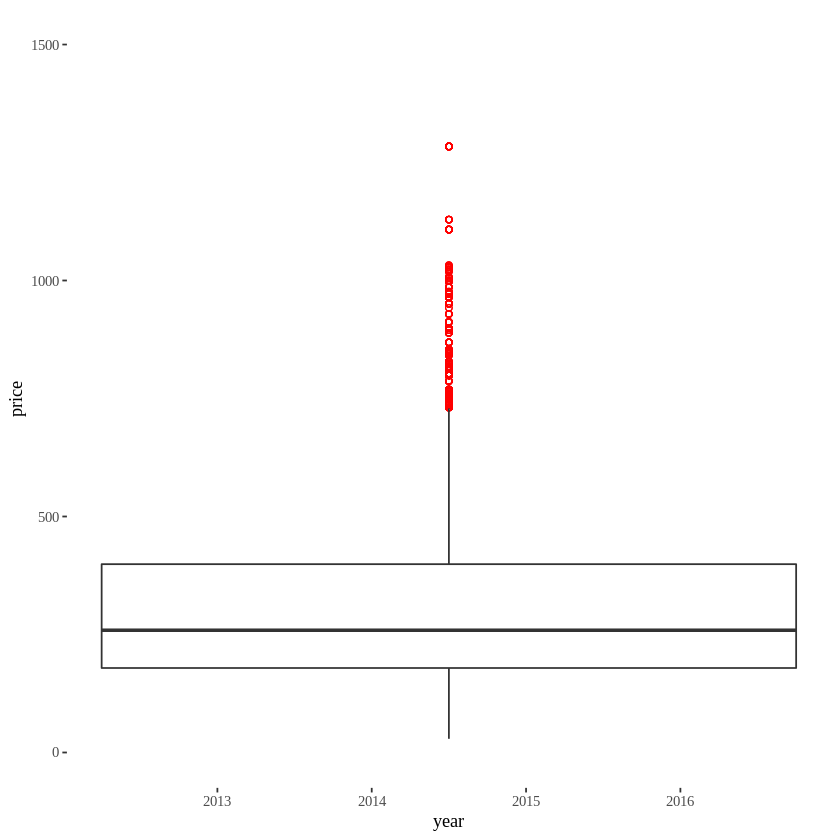

In [ ]:
# Let's plot them using boxplots
# with possible outliers in red
# and removes all data points outside the given range

bxp1 + 
geom_boxplot(outlier.colour = "red", outlier.shape = 1) +
scale_y_continuous(limits = c(0, 1500)) +
theme_tufte() +
ggsave("bxp01.png",width=6, height=4,dpi=300)

Interpretation of the boxplot:<br>


```
The two 'hinges' or extremities of the box represent the first and third quartile, i.e., close to quantile(x, c(1,3)/4).</br>
Boxplot statistical values are represented mainly via the vector *stats* of are a vector of length 5, containing the extreme of the lower whisker, the lower ‘hinge’, the median, the upper ‘hinge’ and the extreme of the upper whisker.<br>
```


[source](http://www.physics.csbsju.edu/stats/box2.html)

In [ ]:
tail(sub_xbox360,3)

V1     date       price week store_id year month
1 275066 2017-02-23 249   8    1595     2017 Feb  
2 275067 2017-02-24 249   8    1595     2017 Feb  
3 275068 2017-02-25 249   8    1595     2017 Feb

### Mahalanobis Distance

[source](https://en.wikipedia.org/wiki/Mahalanobis_distance)

It is a measure of the distance between a point P and a distribution D; it is a multi-dimensional generalization of the measure of how many standard deviations is P away from the mean of D. That distance (MD) grows as P moves away from the mean of D along each principal component axis*.<br>
Mahalanobis distance can also be defined as a dissimilarity measure between two random vectors {\displaystyle {\vec {x}}}{\vec {x}} and {\displaystyle {\vec {y}}}{\vec {y}} of the same distribution with the covariance matrix S. Then, here is a quick reminder of what covariance matrix is.<br>

Also called dispersion matrix, variance matrix, or variance–covariance matrix, it is a square matrix giving the covariance between each pair of elements of a given random vector. Any covariance matrix is symmetric and positive semi-definite and its main diagonal contains variances (i.e., the covariance of each element with itself). Intuitively, the covariance matrix generalizes the notion of variance to multiple dimensions.

[source](https://en.wikipedia.org/wiki/Covariance_matrix)

* [source](https://en.wikipedia.org/wiki/Principal_component_analysis) A sequence of {\displaystyle p}p direction vectors, where the {\displaystyle i^{\text{th}}}i^{{\text{th}}} vector is the direction of a line that best fits the data while being orthogonal to the first {\displaystyle i-1}i-1 vectors. Here, a best-fitting line is defined as one that minimizes the average squared distance from the points to the line.

Note that if the covariance matrix is the identity matrix, the Mahalanobis distance reduces to the Euclidean distance.

In [ ]:
# To demonstrate why we can remove this outliers
# Compute mahalonobis distance and flag outliers if any
# [source](https://www.youtube.com/watch?v=BdEOIQ2ozYM&t=223s)

# First, let's calculate mahalanobis distance with height and weight distribution
# let's select price and year columns
Sx <- cov(sub_xbox360[, c(4,8)])
MD <- mahalanobis(sub_xbox360[, c(4,8)], colMeans(sub_xbox360[, c(4,8)]), Sx)


In [ ]:
# covariance matrix for price and year, with the variances in its diagonal
Sx

price       year       
price 30033.57437 -20.0229397
year    -20.02294   0.7029359

Let's explore the first 100 MD data while rounding it up to 2 decimals

In [ ]:
#head(MD)

[1] 1.4634305 0.6021631 0.1949387 5.0020975 1.4634305 1.9123818

In [ ]:
MD[1:300] %>% round(2)

[1]  0.87  0.45  4.27 12.09 13.68  2.37  0.52  0.31  0.88  0.20  1.02  1.30
 [13]  1.47  4.23  0.69  0.20  0.69  3.24  4.50  1.69  0.90  1.39  0.45  5.88
 [25]  2.43  0.88  0.45  0.45  0.88  0.90  0.89  0.45  0.60  3.16  4.32  0.52
 [37]  5.27  0.69  3.41  3.12  1.16  2.44  0.83  0.69  1.31  1.30  0.50  0.88
 [49]  0.43  0.28  0.85  1.30  0.91  1.08  0.45  4.50  0.69  4.53  0.60  0.60
 [61]  1.31  1.47  2.93  0.20  0.48  0.20  4.45  3.46  0.33  0.96  0.45  0.11
 [73]  0.77  0.69  0.50  0.45  1.49  1.47  1.30  1.30  3.72  1.00  0.45  0.80
 [85]  0.20  0.11  0.13  0.77  1.14  2.68  0.88  1.62  1.22  3.60 10.60  0.52
 [97]  0.88  0.45  1.41  0.11  0.70  4.60  9.68  0.11  1.30  1.21  6.96  1.30
[109]  0.60  4.42  0.16  0.20  2.87  5.27  0.33  1.29  0.39 10.22  0.66  1.21
[121]  0.60  0.44  0.60  1.82  1.24  0.20  2.23  0.13  5.16  0.55  0.88  2.83
[133] 12.32  0.14  0.23  0.20  3.16  0.95  4.32 15.31  0.75  0.45  0.60  0.88
[145]  0.72  2.62  5.61 15.16  3.17  0.45  3.23  1.73  0.52  2.68  3.24  5.99
[157]  3.58  0.52 11.15  1.82  3.17  2.45  0.95  1.14  5.27  3.08  1.82  0.87
[169]  1.52  4.85  0.77  0.23  4.67  0.60  0.19  0.60  3.01  1.24  1.82  2.08
[181]  0.23  1.00  0.95  0.84 15.31  0.45  1.82  0.79  1.58  2.90  0.77  0.96
[193]  0.87  0.14  1.21  0.91  3.33  1.47  1.31  0.20  4.60  2.50  1.09  0.45
[205]  2.71  0.11  2.39  4.60  0.48  0.30  4.10  3.72  2.08  2.96  0.45  0.20
[217]  3.43  0.52  2.36  0.60  4.27  3.33  0.14  0.95  1.77  1.49  0.89  3.40
[229]  1.39  1.49  3.24  0.46  0.28  0.20  3.80  1.09  2.40  0.13  1.43  1.82
[241]  5.88 12.86  1.39  3.24  2.42  0.63  2.13  0.60  3.24  1.30  0.11  0.95
[253]  0.39  2.23  4.60  0.20  0.45  1.24  2.23  2.83 21.54  0.52  2.23  1.44
[265]  0.77  0.45  0.60  1.00  0.60  1.09  1.41  0.45  1.33  3.58  0.85  0.20
[277]  1.18  3.16  1.30  6.31  0.87  0.77  1.39  2.86  1.60  1.39  3.34  0.77
[289]  1.18  1.09 10.22  4.22  1.39  0.14  4.90  0.87  0.33  0.45  4.10  0.11

In [ ]:
sub_xbox360$MD <- round(MD,3)

In [ ]:
head(sub_xbox360,3)

product_id date       category price weekday   week store_id year month
1 3520957    2016-07-06 Xbox 360 449   Wednesday 27   164      2016 Jul  
2 1788218    2016-02-23 Xbox 360 399   Tuesday    8   428      2016 Feb  
3 2719635    2014-12-31 Xbox 360 399   Wednesday  1   127      2014 Dec  
  cpi_adjusted_price log_of_cpi_adjusted_price
1 453.2528           6.116450                 
2 406.1001           6.006600                 
3 406.2164           6.006886                 
  number_of_store_per_product_and_day total_days_for_product
1 8                                   3141                  
2 7                                   5939                  
3 3                                   5158                  
  total_products_in_category MD   
1 64                         0.873
2 64                         0.450
3 64                         4.271

We now want to flag outliers (price data points), and for that we need to get a sense of the data distribution of MDs in order to know what could be a reasonable threashold. Let's then do quick plots.

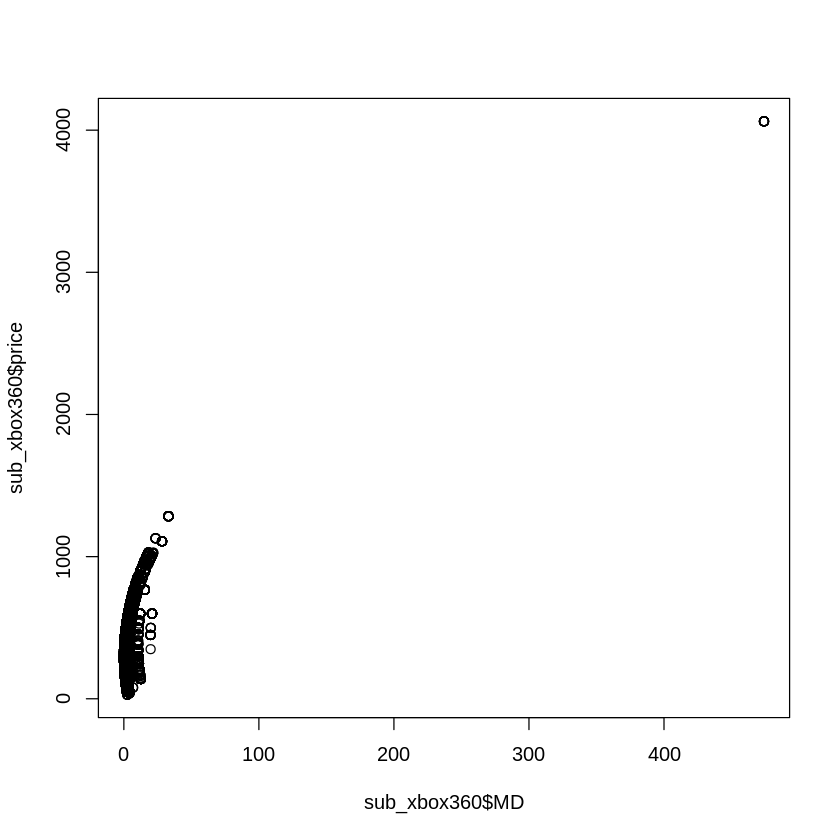

In [ ]:
plot(sub_xbox360$MD, sub_xbox360$price)

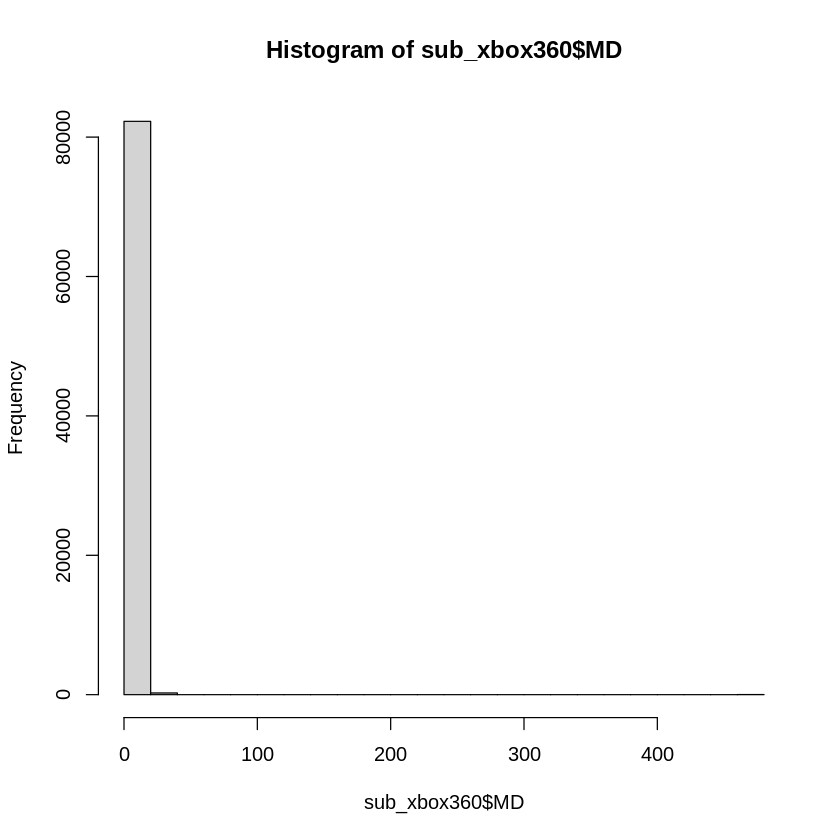

In [ ]:
hist(sub_xbox360$MD)

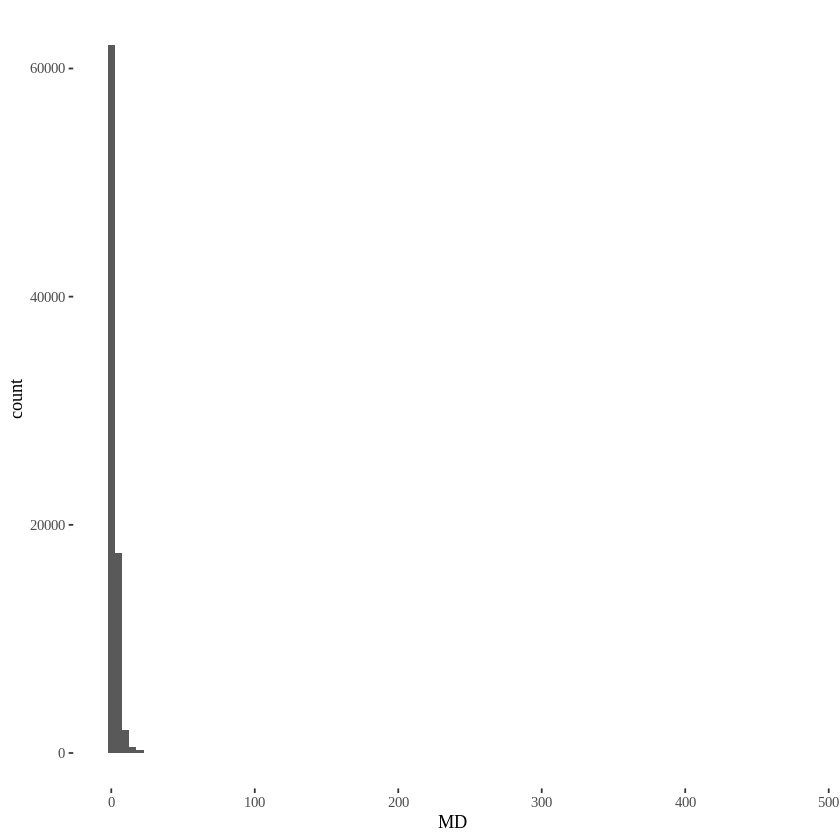

In [ ]:
hist_md <- ggplot(sub_xbox360, aes(x = MD))

# add horizontal lines at Q1, Q2, and Q3
hist_md + 
geom_histogram(binwidth = 5, aes(fill = price)) +
#ggtitle("MD histogram") +
theme_tufte()
ggsave("hist_md.png",width=6, height=4,dpi=300)

In [ ]:
# Let's create a new column where outliers will be flagged
# called outlier_MD
sub_xbox360$outlier_MD <- FALSE
sub_xbox360$outlier_MD[sub_xbox360$MD > 50] <- TRUE

In [ ]:
tail(sub_xbox360)

product_id date       category price weekday   week store_id year month
1 3096808    2016-04-06 Xbox 360 849   Wednesday 14   428      2016 Apr  
2 2010167    2016-01-22 Xbox 360 309   Friday     3   12377    2016 Jan  
3 2678994    2015-01-28 Xbox 360 599   Wednesday  5   578      2015 Jan  
4 1263856    2015-04-24 Xbox 360 249   Friday    17   13676    2015 Apr  
5 3169815    2016-08-17 Xbox 360 249   Wednesday 33   428      2016 Aug  
6  676491    2015-01-24 Xbox 360 399   Saturday   4   112      2015 Jan  
  cpi_adjusted_price log_of_cpi_adjusted_price
1 860.0012           6.756934                 
2 315.5129           5.754200                 
3 616.3098           6.423750                 
4 254.2239           5.538216                 
5 251.6365           5.527986                 
6 410.5302           6.017450                 
  number_of_store_per_product_and_day total_days_for_product
1 8                                   4640                  
2 4                                   3196                  
3 4                                   5400                  
4 3                                   3729                  
5 6                                   3330                  
6 4                                   7035                  
  total_products_in_category MD     outlier_MD
1 64                         10.372 FALSE     
2 64                          0.115 FALSE     
3 64                          3.237 FALSE     
4 64                          0.948 FALSE     
5 64                          0.197 FALSE     
6 64                          0.910 FALSE

In [ ]:
#save as a csv file with the new MD column
# MD enables to identify unusual data in the df#
write.csv(sub_xbox360, "sub_xbox60_MD.csv")

Identify the products that are outliers

In [ ]:
df_outliers <- sub_xbox360 %>% group_by(price) %>% filter(outlier_MD == "TRUE")

In [ ]:
head(df_outliers)

product_id date       category price weekday   week store_id year month
1 2687705    2015-04-27 Xbox 360 4062  Monday    18   1260     2015 Apr  
2 2687705    2015-05-03 Xbox 360 4062  Sunday    18   1260     2015 May  
3 2687705    2015-01-27 Xbox 360 4062  Tuesday    5   1260     2015 Jan  
4 2687705    2015-05-02 Xbox 360 4062  Saturday  18   1260     2015 May  
5 2687705    2015-04-29 Xbox 360 4062  Wednesday 18   1260     2015 Apr  
6 2687705    2015-02-15 Xbox 360 4062  Sunday     7   1260     2015 Feb  
  cpi_adjusted_price log_of_cpi_adjusted_price
1 4147.220           8.330193                 
2 4132.966           8.326751                 
3 4179.383           8.337919                 
4 4132.966           8.326751                 
5 4147.220           8.330193                 
6 4150.268           8.330928                 
  number_of_store_per_product_and_day total_days_for_product
1 3                                   4428                  
2 3                                   4428                  
3 3                                   4428                  
4 3                                   4428                  
5 3                                   4428                  
6 3                                   4428                  
  total_products_in_category MD      outlier_MD
1 64                         474.053 TRUE      
2 64                         474.053 TRUE      
3 64                         474.053 TRUE      
4 64                         474.053 TRUE      
5 64                         474.053 TRUE      
6 64                         474.053 TRUE

In [ ]:
dim(df_outliers)

[1] 10 16

There are ten outliers data points identified.
We can save them as a separate dataframe if interested to analyze them further later on.

In [ ]:
# save as a csv file
write.csv(df_outliers, "df_outliers.csv")

In [ ]:
ggplot(MD, aes(price)) +
geom_density(kernel = "gaussian")

ERROR: ignored

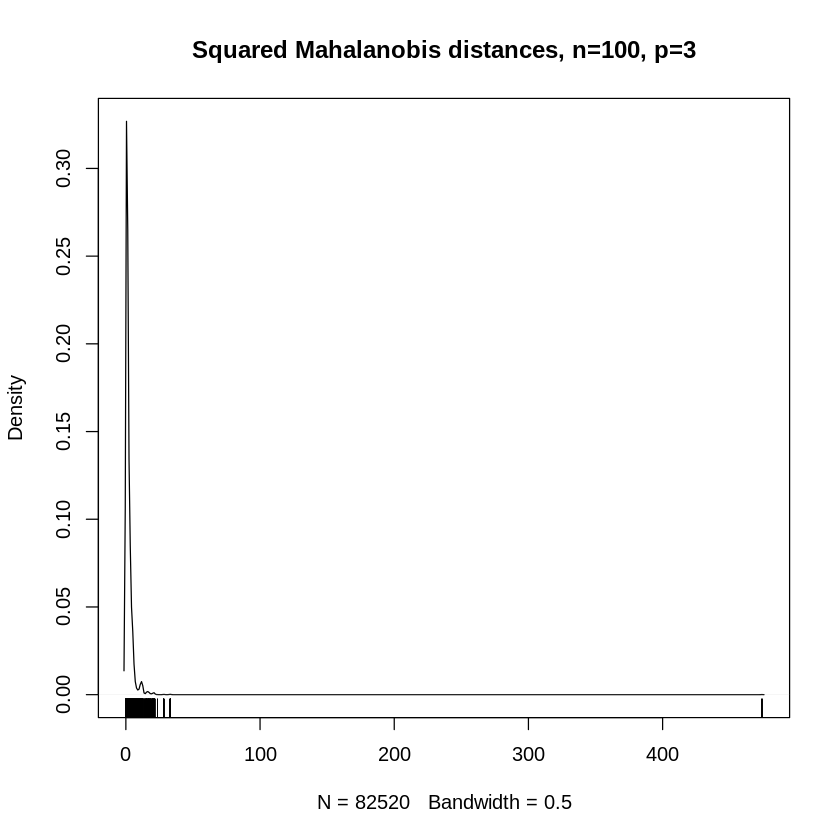

In [ ]:
plot(density(MD, bw = 0.5),
     main="Squared Mahalanobis distances, n=100, p=3") ; rug(MD)


In [ ]:
#qqplot(qchisq(ppoints(100), df = 3), D2,
#       main = expression("Q-Q plot of Mahalanobis" * ~D^2 *
#                         "vs. quantiles of" * ~ chi[3]^2))
#abline(0, 1, col = 'gray')

Now that we've decided not to consider outliers beyond a 1500 price in later visualizations, let's look at data in more granular way by zooming into months.

Warning message:
“Removed 10 rows containing missing values (geom_point).”
Warning message:
“Removed 10 rows containing missing values (geom_point).”


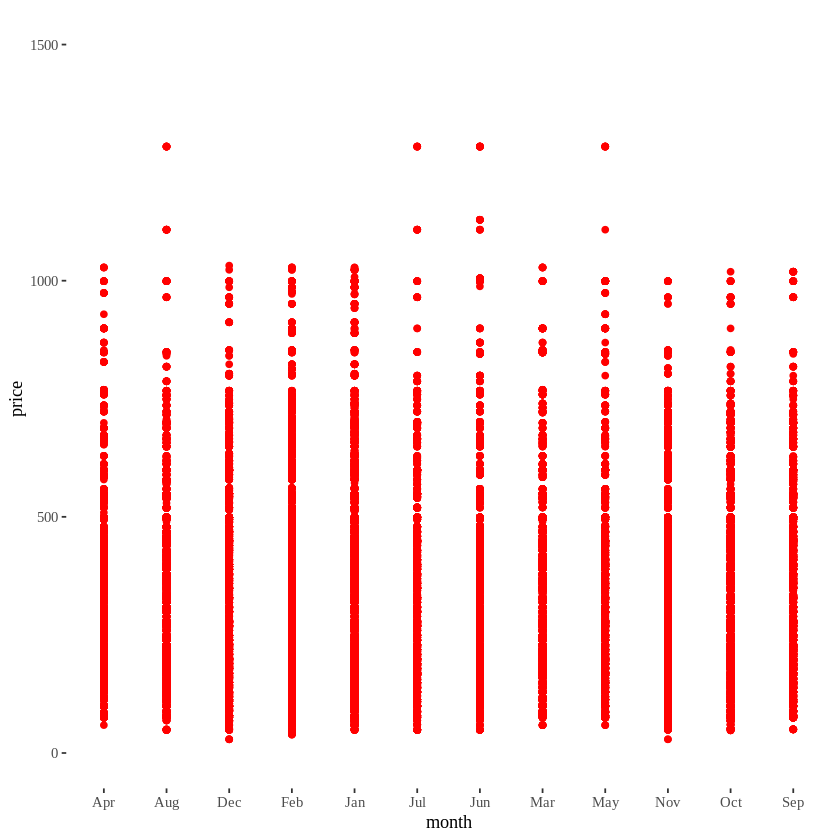

In [ ]:
plot4 <- ggplot(sub_xbox360, aes(x = month, y = price))

plot4 + geom_point(colour = "red") +
scale_y_continuous(limits = c(0, 1500)) +
theme_tufte() +
ggsave("plot4.png",width=6, height=4,dpi=300)


In [ ]:
# let's zoom in deeper
plot04 <- ggplot(subset(sub_xbox360[,], aes(x = year, y = price))

plot04 +
#geom_histogram(kernel = "gaussian") +
#scale_x_continuous(limits = c(2012, 2015)) +
#scale_y_continuous(limits = c(0, 1500)) +
theme_minimal()

ERROR: ignored

In [ ]:
?boxplot.stats

In [ ]:
# identify the outliers
#sub_xbox360$store_id[!sub_xbox360$store_id %in% boxplot.stats(sub_xbox360$store_id)$out]

In [ ]:
# check Mahalanobis distance for determining outliners
# and explaining why
# source: https://towardsdatascience.com/mahalonobis-distance-and-outlier-detection-in-r-cb9c37576d7d
# https://www.datacamp.com/community/tutorials/pca-analysis-r

In [ ]:
sub_xbox360$store_id <- as.factor(sub_xbox360$store_id)

Warning message:
“Removed 38 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 38 rows containing non-finite values (stat_boxplot).”


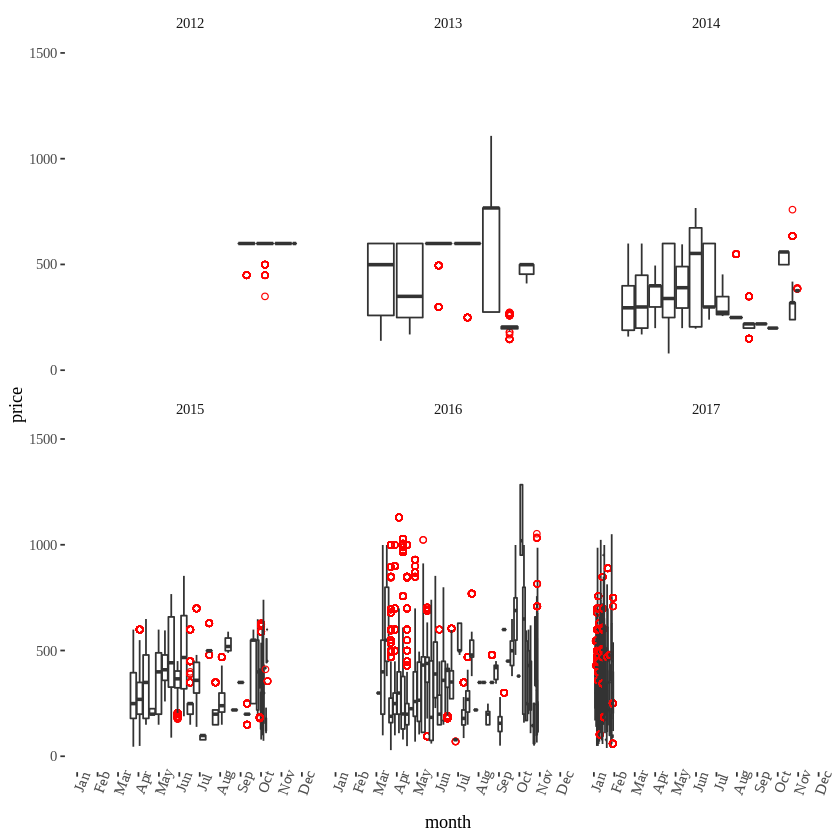

In [ ]:
# There seeems to be outliners.
# Let's plot by year over the months

#sub_xbox360$store_id <- as.factor(sub_xbox360$store_id)

bxp2 <- ggplot(data = xbox360, mapping = aes(x = month, y = price, group = store_id))

bxp2 + geom_boxplot(outlier.colour = "red", outlier.shape = 1) +
scale_y_continuous(limits = c(0, 1500)) +
scale_x_discrete(limits = month.abb) +
facet_wrap(~year) +
theme_tufte() +
theme(axis.text.x = element_text(angle = 70)) +
ggsave("bxp2.png",width=6, height=4,dpi=300)

Warning message:
“Removed 38 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 38 rows containing non-finite values (stat_boxplot).”


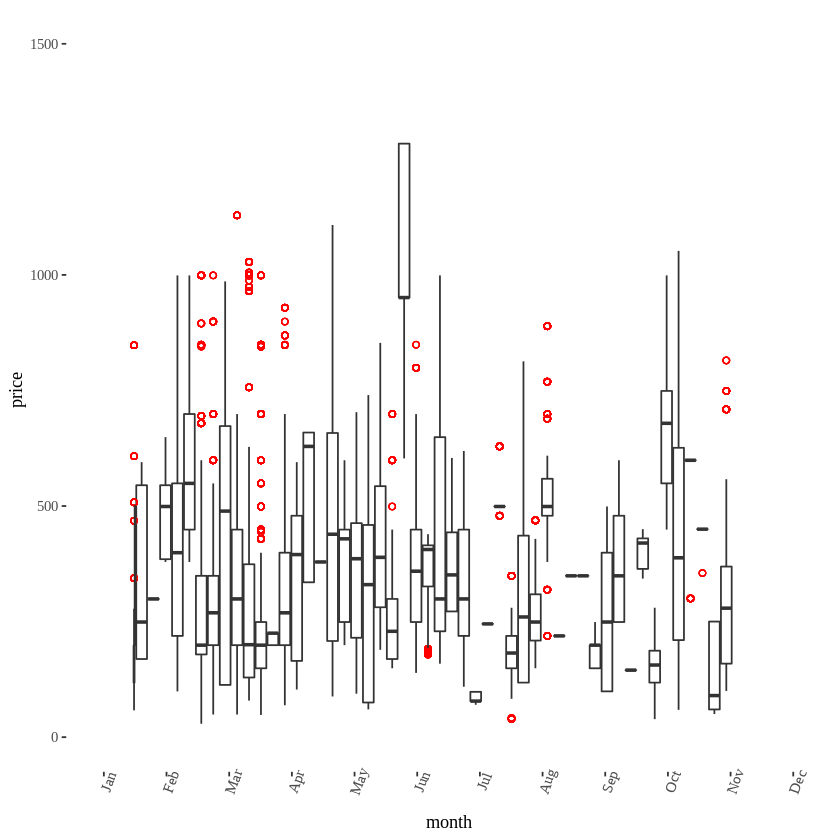

In [ ]:
# Let's see if there is a pattern, cyclical behaviour
# Let's plot by month over cumulated years

#bxp2 <- ggplot(data = xbox360, mapping = aes(x = month, y = price, group = store_id))

bxp2 + geom_boxplot(outlier.colour = "red", outlier.shape = 1) +
scale_y_continuous(limits = c(0, 1500)) +
scale_x_discrete(limits = month.abb) +
#facet_wrap(~year) +
theme_tufte() +
theme(axis.text.x = element_text(angle = 70)) +
ggsave("bxp02.png",width=6, height=4,dpi=300)

Warning message:
“Removed 13 rows containing missing values (geom_point).”
Warning message:
“Removed 38 rows containing non-finite values (stat_boxplot).”


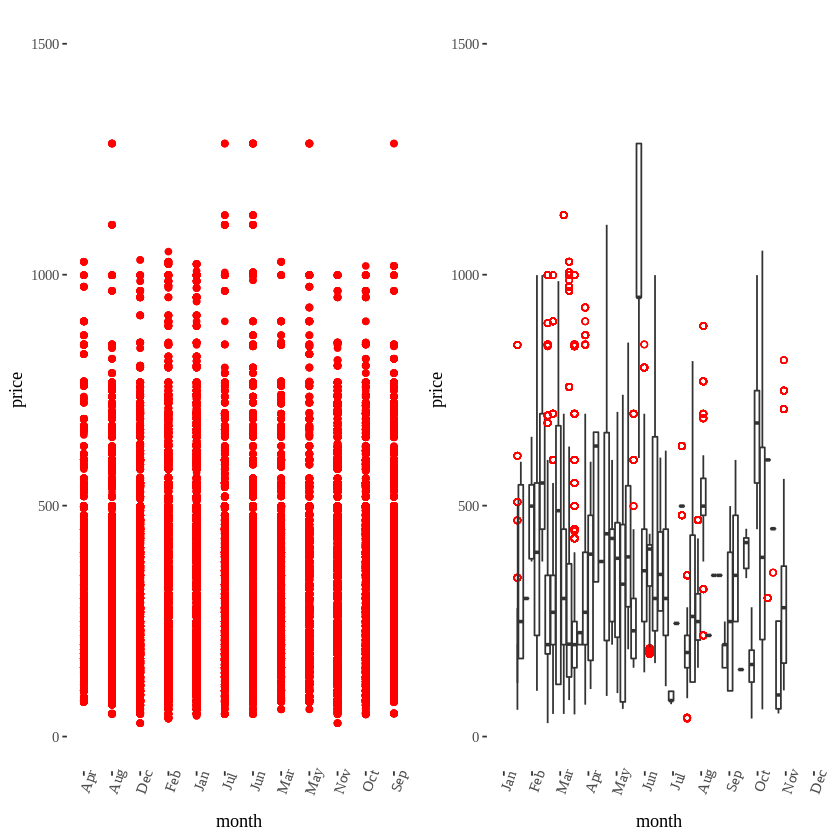

In [ ]:
#library(gridExtra)

plot40 <- ggplot(sub_xbox360, aes(x = month, y = price)) +
geom_point(colour = "red") +
scale_y_continuous(limits = c(0, 1500)) +
theme_tufte() +
theme(axis.text.x = element_text(angle = 70))


bxp20 <- ggplot(data = xbox360, mapping = aes(x = month, y = price, group = store_id)) +
geom_boxplot(outlier.colour = "red", outlier.shape = 1) +
scale_y_continuous(limits = c(0, 1500)) +
scale_x_discrete(limits = month.abb) +
theme_tufte() +
theme(axis.text.x = element_text(angle = 70))

grid.arrange(plot40, bxp20, ncol=2)


Warning message:
“Removed 38 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 38 rows containing non-finite values (stat_boxplot).”


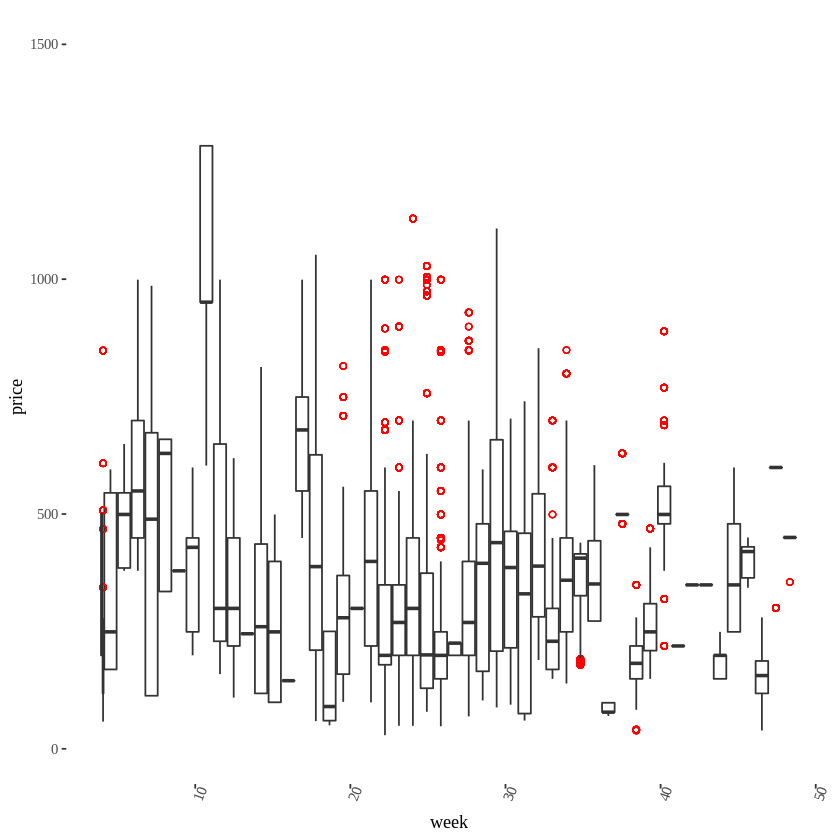

In [ ]:
# Let's see if there is a pattern, cyclical behaviour
# Let's plot by month over cumulated years

bxp3 <- ggplot(data = xbox360, mapping = aes(x = week, y = price, group = store_id))

bxp3 + geom_boxplot(outlier.colour = "red", outlier.shape = 1) +
scale_y_continuous(limits = c(0, 1500)) +
#scale_x_discrete(limits = month.abb) +
#facet_wrap(~year) +
theme_tufte() +
theme(axis.text.x = element_text(angle = 70)) +
ggsave("bxp3.png",width=6, height=4,dpi=300)

In [ ]:
#?geom_boxplot

Warning message:
“Removed 38 rows containing missing values (geom_point).”
Warning message:
“Removed 38 rows containing missing values (geom_point).”


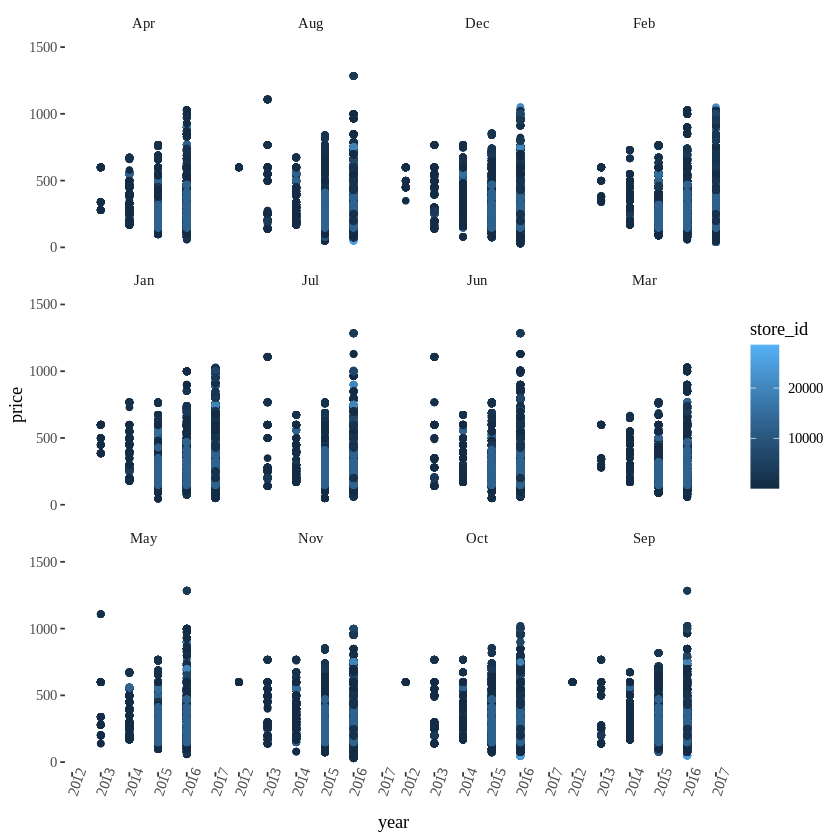

In [ ]:
# Let's plot a 
plot5 <- ggplot(data = xbox360)

plot5 +
  geom_point(mapping = aes(x = year, y = price, colour =store_id)) +
  scale_y_continuous(limits = c(0, 1500)) +
  facet_wrap(~month) +
  theme_tufte() +
  theme(axis.text.x = element_text(angle = 70)) +
  ggsave("plot5.png",width=6, height=4,dpi=300)

In [ ]:
# Let's plot a 
plot5 +
  #geom_col(mapping = aes(x = month, y = price)) +
  geom_bar(mapping = aes(x = month, fill = month)) +
  geom_line()+
  #scale_y_continuous(limits = c(0, 3000)) +
  scale_x_discrete(limits = month.abb) +
  facet_wrap(~year) +
  theme_tufte() +
  theme(axis.text.x = element_text(angle = 70))
  ggsave("plot05.png",width=6, height=4,dpi=300)
  #geom_smooth(method = lm)

ERROR: ignored

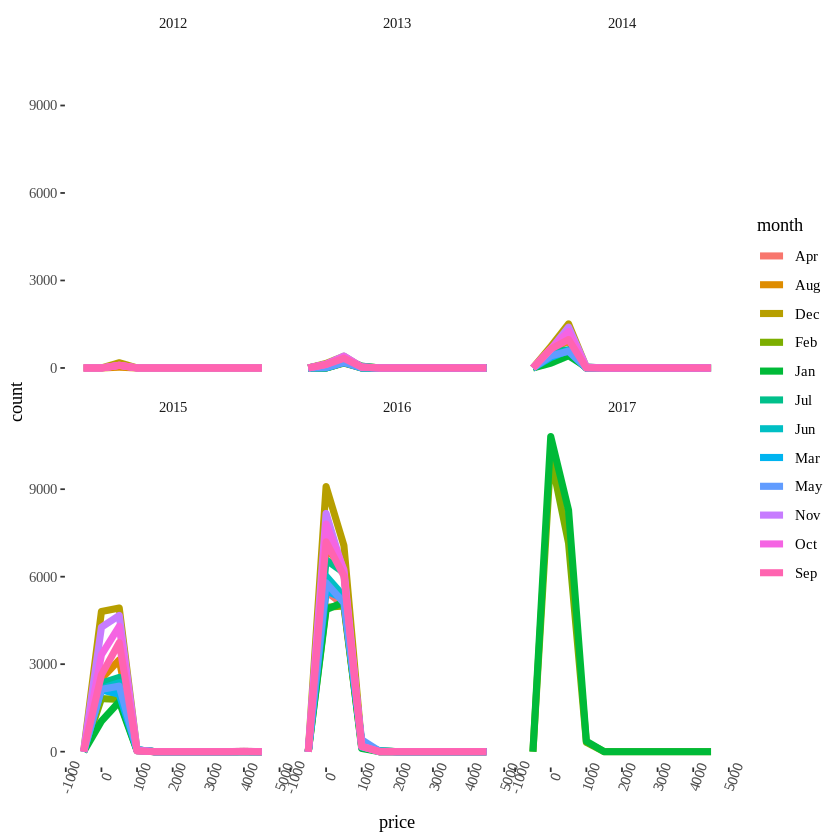

In [ ]:
plot6 <- ggplot(xbox360, aes(price, colour = month))

plot6 + geom_freqpoly(binwidth = 500, size=2) +
facet_wrap(~year) +
theme_tufte() +
theme(axis.text.x = element_text(angle = 70)) +
ggsave("plot6.png",width=6, height=4,dpi=300)

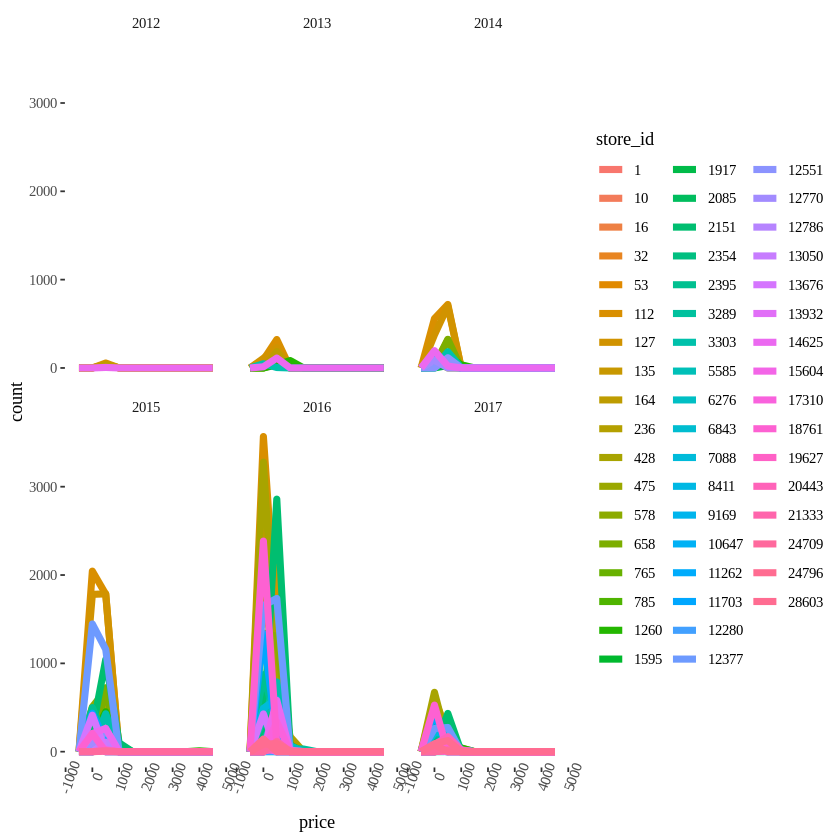

In [ ]:
plot7 <- ggplot(sub_xbox360, aes(price, colour = store_id))

plot7 + geom_freqpoly(binwidth = 500, size=2) +
facet_wrap(~year) +
theme_tufte() +
theme(axis.text.x = element_text(angle = 70)) +
ggsave("plot7.png",width=6, height=4,dpi=300)

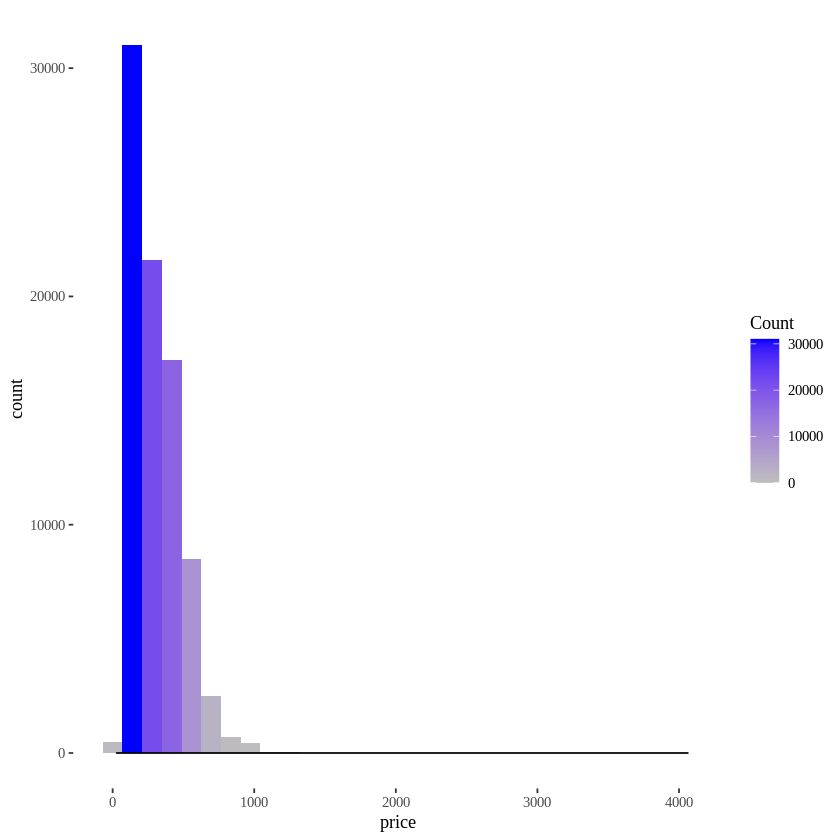

In [ ]:
plot8 <- ggplot(sub_xbox360, aes(price))

plot8 +
      geom_histogram(aes(fill=..count..), bins = 30) +
      scale_fill_gradient("Count", low = "grey", high = "blue")+
      geom_density(position = "stack") +
      theme_tufte() +
      ggsave("plot8.png",width=6, height=4,dpi=300)

Warning message:
“Removed 70 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”
Warning message:
“Removed 70 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


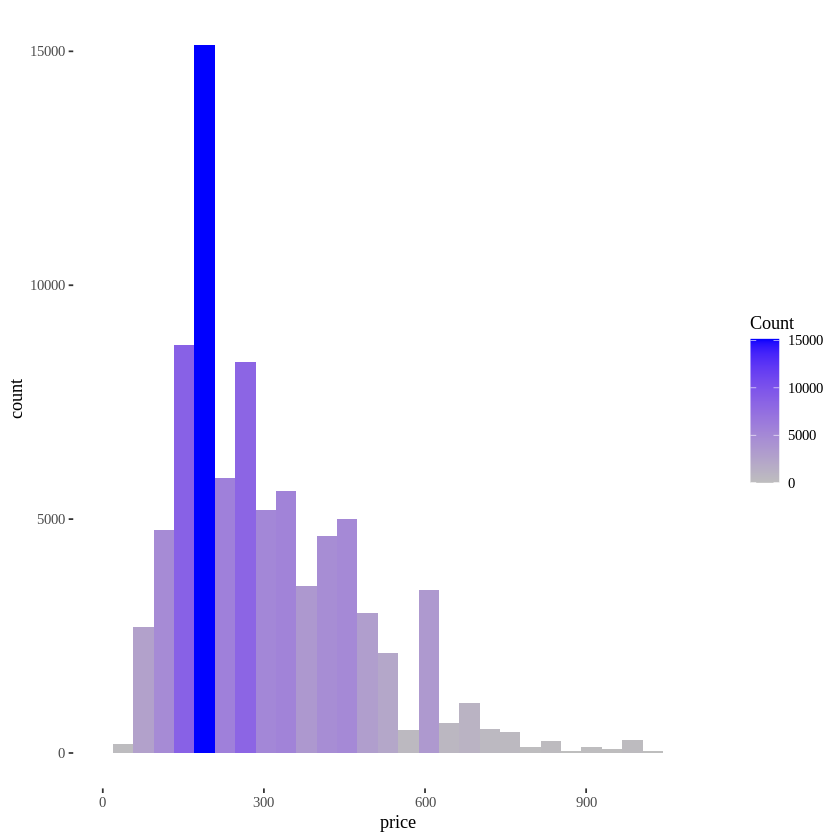

In [ ]:
# We observe that most data are located between price range of 0 and 1100
# Let's scale it dowm to it and observe the data distribution
plot8 +
      geom_histogram(aes(fill=..count..), bins = 30) +
      scale_fill_gradient("Count", low = "grey", high = "blue")+
      scale_x_continuous(limits = c(0, 1100)) +
      theme_tufte() +
      ggsave("plot08.png",width=6, height=4,dpi=300)

In [ ]:
# Let's plot with autoplot function
install.packages("forecast")
install.packages("ffp2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘ffp2’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


In [ ]:
install.packages(c("quantmod", "xts", "tseries", "forecast", "timeseries"), dependencies = TRUE)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘timeseries’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Warning message:
“Perhaps you meant ‘timeSeries’ ?”
also installing the dependencies ‘bit’, ‘bit64’, ‘plogr’, ‘tinytex’, ‘x13binary’, ‘RMySQL’, ‘RSQLite’, ‘timeSeries’, ‘downloader’, ‘chron’, ‘fts’, ‘tis’, ‘RUnit’, ‘forecTheta’, ‘rticles’, ‘seasonal’, ‘uroot’




In [ ]:
library(forecast)
library(fpp2)


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



ERROR: ignored

In [ ]:
plot8 +
geom_smooth()

ERROR: ignored

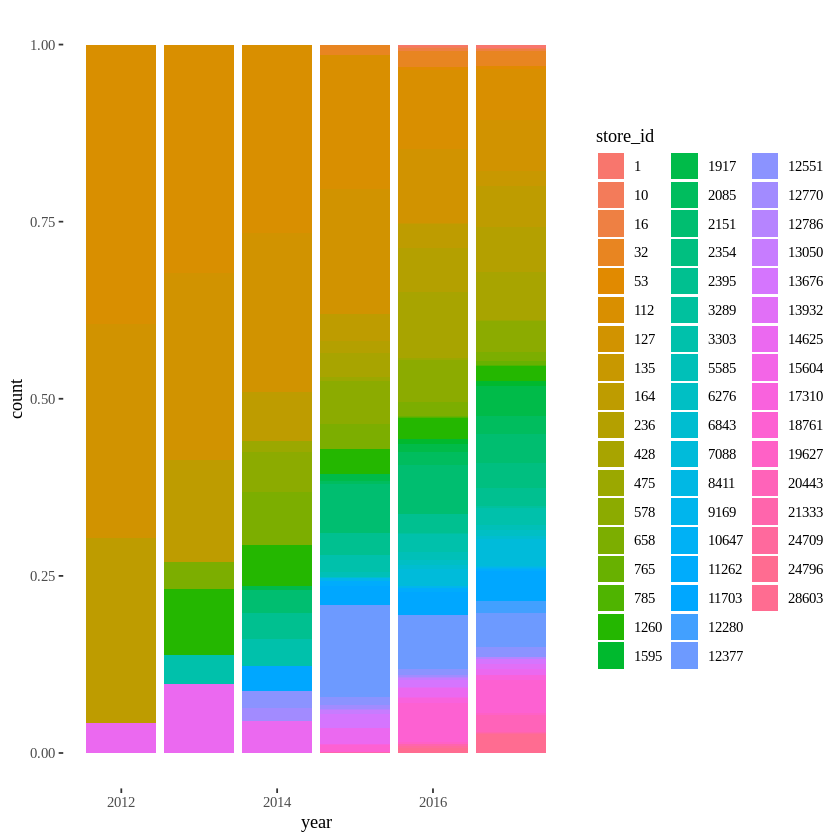

In [ ]:
plot9 <- ggplot(sub_xbox360, aes(year))

plot9 +
      geom_bar(mapping = aes(x = year, fill = store_id), position = "fill") +
      #scale_fill_gradient("Count", low = "grey", high = "blue") +
      theme_tufte() +
      ggsave("plot9.png",width=6, height=4,dpi=300)

In [ ]:
plot8 +
      geom_bar(mapping = aes(x = year, fill = store_id), position = "fill") +
      #scale_fill_gradient("Count", low = "grey", high = "blue") +
      theme_minimal() +
      ggsave("plot008.png",width=6, height=4,dpi=300)

In [ ]:
# Try other visualization themes

install.packages("ggthemes")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
#library(ggthemes)

# Create plot with different themes from ggthemes:
#plot8 + theme_tufte() # Minimalist Tufte theme
#plot8 + theme_wsj() # Wall Street Journal
#plot8 + theme_solarized() + scale_colour_solarized() # Solarized colours

##############################


Warning message:
“Removed 70 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”
Warning message:
“Removed 70 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


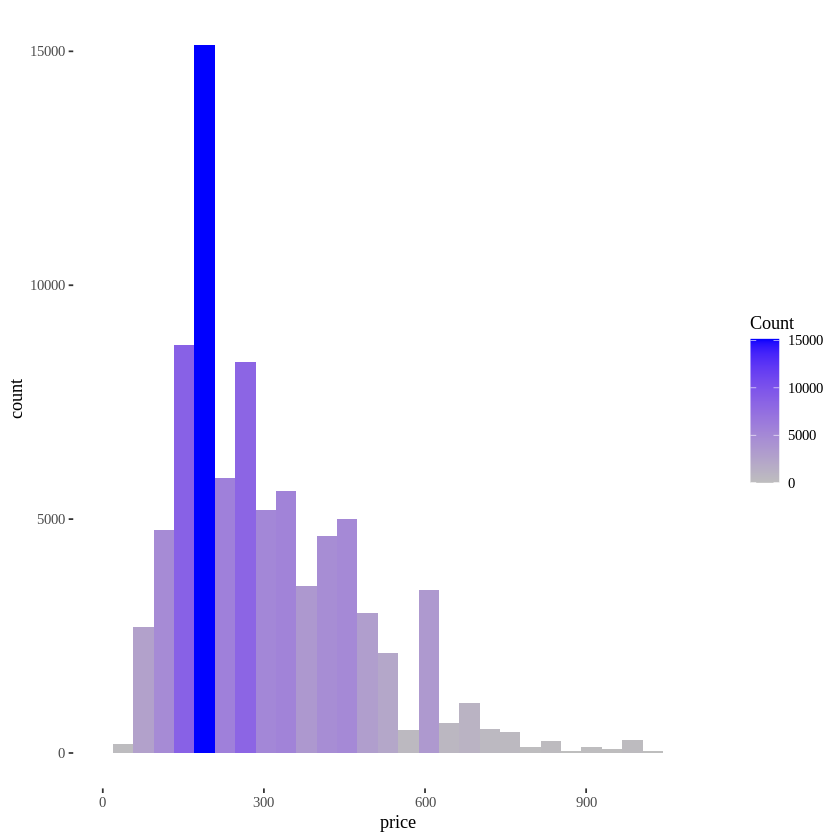

In [ ]:
plot8 +
      geom_histogram(aes(fill=..count..), bins = 30) +
      scale_fill_gradient("Count", low = "grey", high = "blue")+
      scale_x_continuous(limits = c(0, 1100)) +
      theme_tufte() +
      ggsave("plot08.png",width=6, height=4,dpi=300)

In [ ]:
install.packages("hrbrthemes")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘extrafontdb’, ‘Rttf2pt1’, ‘extrafont’, ‘gdtools’


Warning message in install.packages("hrbrthemes"):
“installation of package ‘gdtools’ had non-zero exit status”
Warning message in install.packages("hrbrthemes"):
“installation of package ‘hrbrthemes’ had non-zero exit status”


In [ ]:
#install.packages("hbrthemes")

In [ ]:
#library(hrbrthemes)

# Create plot with different themes from hrbrthemes:
#plot8 + theme_ipsum() # Ipsum theme
#plot8 + theme_ft_rc() # Suitable for use with dark RStudio themes
#plot8 + theme_modern_rc() # Suitable for use with dark RStudio themes

ERROR: ignored

### Visualize possible correlations

[source](https://www.reddit.com/r/rstats/comments/m1g0rc/new_package_ppsr_visualizes_predictive_relations/)

In [ ]:
# Analyze possible correlation between features of the dataset
# install needed packages
install.packages("ppsr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘globals’, ‘parsnip’, ‘gridExtra’




In [ ]:
install.packages(factoextra)

ERROR: ignored

In [ ]:
library(tidyverse)  # data manipulation
library(cluster)    # clustering algorithms
#library(factoextra) # clustering algorithms & visualization

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  3.1.0     ✔ purrr   0.3.4
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ ggplot2::%+%()     masks psych::%+%()
✖ ggplot2::alpha()   masks psych::alpha()
✖ dplyr::between()   masks data.table::between()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::first()     masks data.table::first()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::last()      masks data.table::last()
✖ purrr::transpose() masks data.table::transpose()



ERROR: ignored

In [ ]:
#install.packages("rlang",type="win.binary")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



ERROR: ignored

In [ ]:
#devtools::install_github("kassambara/factoextra")

xfun         (0.21  -> 0.22      ) [CRAN]
RcppArmad... (NA    -> 0.10.2.2.0) [CRAN]
matrixStats  (NA    -> 0.58.0    ) [CRAN]
openxlsx     (NA    -> 4.2.3     ) [CRAN]
conquer      (NA    -> 1.0.2     ) [CRAN]
MatrixModels (NA    -> 0.5-0     ) [CRAN]
SparseM      (NA    -> 1.81      ) [CRAN]
utf8         (1.1.4 -> 1.2.1     ) [CRAN]
numDeriv     (NA    -> 2016.8-1.1) [CRAN]
sp           (NA    -> 1.4-5     ) [CRAN]
RcppEigen    (NA    -> 0.3.3.9.1 ) [CRAN]
statmod      (NA    -> 1.4.35    ) [CRAN]
nloptr       (NA    -> 1.2.2.2   ) [CRAN]
minqa        (NA    -> 1.2.4     ) [CRAN]
pillar       (1.5.0 -> 1.5.1     ) [CRAN]
lme4         (NA    -> 1.1-26    ) [CRAN]
rio          (NA    -> 0.5.26    ) [CRAN]
maptools     (NA    -> 1.1-1     ) [CRAN]
quantreg     (NA    -> 5.85      ) [CRAN]
pbkrtest     (NA    -> 0.5.1     ) [CRAN]
abind        (NA    -> 1.4-5     ) [CRAN]
carData      (NA    -> 3.0-4     ) [CRAN]
car          (NA    -> 3.0-10    ) [CRAN]
corrplot     (NA    -> 0.84      )

Installing 42 packages: xfun, RcppArmadillo, matrixStats, openxlsx, conquer, MatrixModels, SparseM, utf8, numDeriv, sp, RcppEigen, statmod, nloptr, minqa, pillar, lme4, rio, maptools, quantreg, pbkrtest, abind, carData, car, corrplot, isoband, gridExtra, plyr, rstatix, polynom, ggsignif, cowplot, ggsci, ggrepel, scatterplot3d, leaps, flashClust, ellipse, viridis, reshape2, ggpubr, FactoMineR, dendextend

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



ERROR: ignored

In [ ]:
library(ppsr)

#apply predictive power scores (PPS)
#ppsr::visualize_both(df=sub_xbox360)

In [ ]:
df0 <- scale(sub_xbox360$price)

In [ ]:
#df10 <- scale(sub_xbox360)
#head(df)

distance0 <- get_dist(df0)
fviz_dist(distance0, gradient = list(low = "#00AFBB", mid = "white", high = "#FC4E07"))

ERROR: ignored

[source](https://cran.r-project.org/web/packages/corrgram/vignettes/corrgram_examples.html)
[source2](https://uc-r.github.io/kmeans_clustering)

## Clustering

In [ ]:
tail(sub_xbox360,3)

product_id date       category price weekday   week store_id year month
1 1273000    2016-06-13 Xbox 360 279   Monday    24   12377    2016 Jun  
2 2715683    2015-12-09 Xbox 360 449   Wednesday 50     428    2015 Dec  
3 1385061    2016-12-06 Xbox 360 159   Tuesday   49   28603    2016 Dec  
  cpi_adjusted_price log_of_cpi_adjusted_price
1 281.8117           5.641239                 
2 456.8880           6.124438                 
3 159.0249           5.069061                 
  number_of_store_per_product_and_day total_days_for_product
1 6                                   3974                  
2 6                                   4227                  
3 8                                   6811                  
  total_products_in_category
1 64                        
2 64                        
3 64

In [ ]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
df10 <- sample_frac(sub_xbox360, 0.1)

In [ ]:
head(df10,3)

product_id date       category price weekday  week store_id year month
1 3186029    2016-01-08 Xbox 360 499   Friday    1   236      2016 Jan  
2 2067368    2016-10-08 Xbox 360 435   Saturday 40   17310    2016 Oct  
3 1965068    2016-10-23 Xbox 360 113   Sunday   42   1260     2016 Oct  
  cpi_adjusted_price log_of_cpi_adjusted_price
1 509.5177           6.233465                 
2 437.3665           6.080772                 
3 113.6147           4.732813                 
  number_of_store_per_product_and_day total_days_for_product
1 6                                   5274                  
2 7                                   3398                  
3 7                                   3364                  
  total_products_in_category MD    outlier_MD
1 64                         1.467 FALSE     
2 64                         0.738 FALSE     
3 64                         1.288 FALSE

In [ ]:
tail(sub_xbox360,3)

V1     product_id date       category price weekday  week store_id year month
1 242908 2641145    2017-02-20 Xbox 360 249   Monday    8   112      2017 Feb  
2 153541 3152067    2015-11-14 Xbox 360 479   Saturday 46   164      2015 Nov  
3  65803   43931    2015-12-26 Xbox 360 179   Saturday 52   127      2015 Dec  
  cpi_adjusted_price log_of_cpi_adjusted_price
1 249.0000           5.517453                 
2 488.1296           6.190581                 
3 182.1446           5.204801                 
  number_of_store_per_product_and_day total_days_for_product
1 18                                  4556                  
2  7                                  4565                  
3  5                                  4147                  
  total_products_in_category
1 64                        
2 64                        
3 64

In [ ]:
# Normalization
z <- df10[, c(4,8)]
m <- apply(z, 2, mean)
s <- apply(z, 2, sd)
z <- scale(z, m, s)


In [ ]:
# Calculate the Euclidean distance
distance <- dist(z)
# d <- dist(z, method = "euclidean")
#distance
#print(distance, digits = 2)

In [ ]:
install.packages("data.tree")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(data.tree)

#png(file="dendogram2.png",
#width=900, height=600)

#hc.l <- hclust(distance)
#plot(hc.l, labels = df10$store_id)

In [ ]:
dim(distance)

NULL

In [ ]:
hc.l <- hclust(distance)
plot(hc.l, labels = df10$store_id)

**Hierarchical Agglomerative**
[source](https://www.statmethods.net/advstats/cluster.html)

The "ward" method has been renamed to "ward.D"; note new "ward.D2"



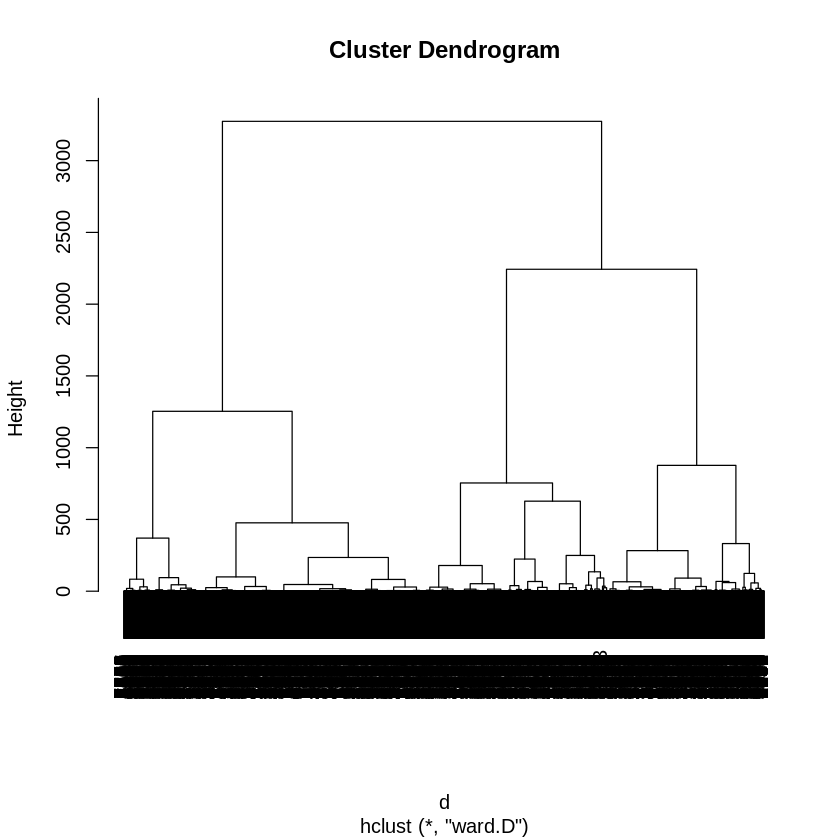

In [ ]:
# OR
# Ward Hierarchical Clustering
d <- dist(z, method = "euclidean") # distance matrix, or distance
fit <- hclust(d, method="ward")
plot(fit) # display dendogram

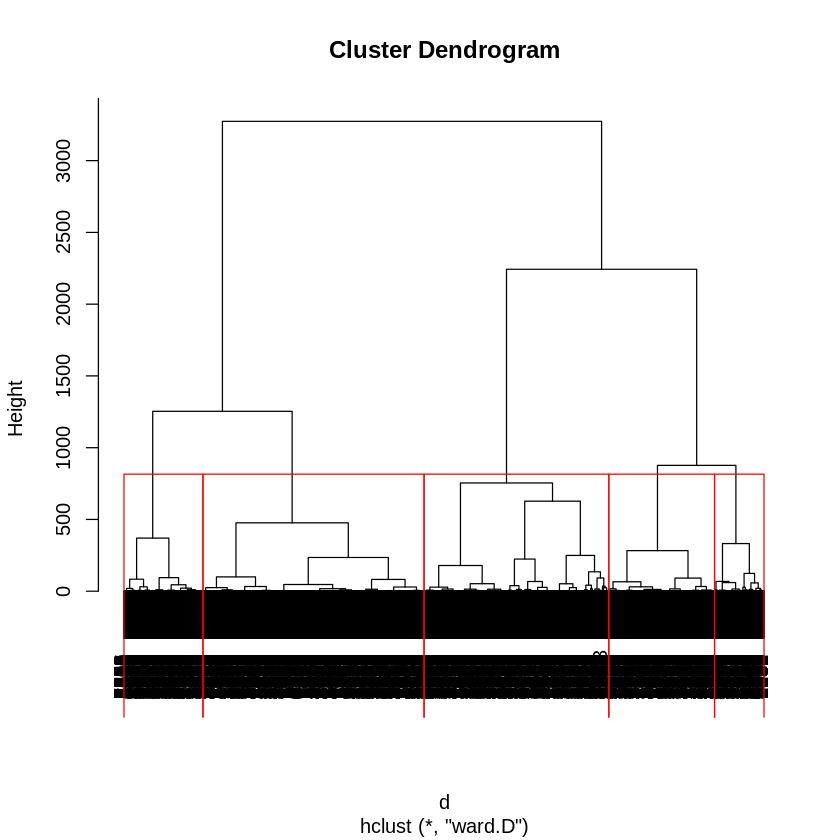

In [ ]:
# OR
# Ward Hierarchical Clustering
d <- dist(z, method = "euclidean") # distance matrix, or distance
fit <- hclust(d, method="ward")
plot(fit) # display dendogram

#plot(fit)

groups <- cutree(fit, k=5) # cut tree into 5 clusters
# draw dendogram with red borders around the 5 clusters
rect.hclust(fit, k=5, border="red")

Let's try to resize it to see better the labels.

In [ ]:
head(fit, 3)

$merge
         [,1]  [,2]
   [1,]    -1   -14
   [2,]  -256     1
   [3,]  -539     2
   [4,]  -627     3
   [5,]  -667     4
   [6,] -1075     5
   [7,] -1265     6
   [8,] -1432     7
   [9,] -1578     8
  [10,] -1715     9
  [11,] -1790    10
  [12,] -1796    11
  [13,] -1939    12
  [14,] -1945    13
  [15,] -1947    14
  [16,] -2247    15
  [17,] -2362    16
  [18,] -2464    17
  [19,] -2557    18
  [20,] -2582    19
  [21,] -2763    20
  [22,] -2887    21
  [23,] -3016    22
  [24,] -3113    23
  [25,] -3123    24
  [26,] -3432    25
  [27,] -3639    26
  [28,] -3658    27
  [29,] -3686    28
  [30,] -3697    29
  [31,] -3853    30
  [32,] -3920    31
  [33,] -3938    32
  [34,] -4016    33
  [35,] -4218    34
  [36,] -4378    35
  [37,] -4400    36
  [38,] -4507    37
  [39,] -4599    38
  [40,] -4697    39
  [41,] -4702    40
  [42,] -4712    41
  [43,] -5084    42
  [44,] -5531    43
  [45,] -5625    44
  [46,] -5750    45
  [47,] -6237    46
  [48,] -6407    47
  [49,] -6491    48
  [50,] -6615    49
  [51,] -6755    50
  [52,] -6842    51
  [53,] -6867    52
  [54,] -7139    53
  [55,] -7170    54
  [56,] -7300    55
  [57,] -7332    56
  [58,] -7344    57
  [59,] -7483    58
  [60,] -7509    59
  [61,] -7609    60
  [62,] -7980    61
  [63,] -8007    62
  [64,] -8013    63
  [65,]    -2 -2378
  [66,] -3105    65
  [67,]    -3  -162
  [68,]  -206    67
  [69,]  -454    68
  [70,]  -549    69
  [71,]  -624    70
  [72,]  -684    71
  [73,]  -698    72
  [74,]  -735    73
  [75,]  -903    74
  [76,]  -931    75
  [77,]  -971    76
  [78,] -1094    77
  [79,] -1102    78
  [80,] -1208    79
  [81,] -1211    80
  [82,] -1373    81
  [83,] -1415    82
  [84,] -1479    83
  [85,] -1493    84
  [86,] -1735    85
  [87,] -1908    86
  [88,] -2176    87
  [89,] -3533    88
  [90,] -3677    89
  [91,] -3707    90
  [92,] -4070    91
  [93,] -4154    92
  [94,] -4194    93
  [95,] -4312    94
  [96,] -4801    95
  [97,] -5000    96
  [98,] -5213    97
  [99,] -5313    98
 [100,] -5417    99
 [101,] -5704   100
 [102,] -5713   101
 [103,] -5725   102
 [104,] -6509   103
 [105,] -6659   104
 [106,] -6728   105
 [107,] -6890   106
 [108,] -6938   107
 [109,] -6991   108
 [110,] -7489   109
 [111,] -7502   110
 [112,] -7738   111
 [113,] -7988   112
 [114,] -8101   113
 [115,]    -4  -492
 [116,] -2254   115
 [117,] -3201   116
 [118,]    -5  -144
 [119,]  -147   118
 [120,]  -554   119
 [121,]  -871   120
 [122,] -1621   121
 [123,] -2074   122
 [124,] -2320   123
 [125,] -2833   124
 [126,] -2961   125
 [127,] -3096   126
 [128,] -3605   127
 [129,] -4032   128
 [130,] -4460   129
 [131,] -6471   130
 [132,] -6643   131
 [133,] -6663   132
 [134,] -6768   133
 [135,] -6878   134
 [136,] -7129   135
 [137,] -7189   136
 [138,] -7240   137
 [139,] -7404   138
 [140,] -8210   139
 [141,]    -6 -1226
 [142,] -1301   141
 [143,] -1309   142
 [144,] -1498   143
 [145,] -1672   144
 [146,] -1699   145
 [147,] -2363   146
 [148,] -2437   147
 [149,] -2526   148
 [150,] -2739   149
 [151,] -3847   150
 [152,] -3969   151
 [153,] -4295   152
 [154,] -4525   153
 [155,] -4971   154
 [156,] -5588   155
 [157,] -5944   156
 [158,] -6196   157
 [159,] -6306   158
 [160,] -6696   159
 [161,]    -7  -990
 [162,] -3818   161
 [163,] -7652   162
 [164,]    -8   -29
 [165,]  -113   164
 [166,]  -211   165
 [167,]  -222   166
 [168,]  -225   167
 [169,]  -241   168
 [170,]  -325   169
 [171,]  -337   170
 [172,]  -364   171
 [173,]  -427   172
 [174,]  -442   173
 [175,]  -463   174
 [176,]  -470   175
 [177,]  -504   176
 [178,]  -725   177
 [179,]  -733   178
 [180,]  -915   179
 [181,]  -945   180
 [182,]  -998   181
 [183,] -1026   182
 [184,] -1114   183
 [185,] -1134   184
 [186,] -1171   185
 [187,] -1204   186
 [188,] -1314   187
 [189,] -1332   188
 [190,] -1381   189
 [191,] -1394   190
 [192,] -1455   191
 [193,] -1543   192
 [194,] -1645   193
 [195,] -1673   194
 [196,] -1708   195
 [197,] -1745   196
 [198,] -1772   197
 [199,] -1829

In [ ]:
tail(z, 3)

price      year      
[8250,] -1.1609076  1.5176536
[8251,] -0.2460531 -2.0523799
[8252,] -0.6200502 -0.8623687

In [ ]:
# let's get the double vector z, subset of normalized dataframe df10
df_z <- as.data.frame(z)

sub_z <- sample_frac(df_z, 0.1)

In [ ]:
# OR
set.seed(123) # to shuffle the data in a way defined by the seed value
# so that we always have the same dataset everytime seeding data

sample_z = sample.split(df_z, SplitRatio = .70)

# Also build train and test datasets for later predictive analytics
train_z = subset(z, sample_z == TRUE)
test_z = subset(z, sample_z == FALSE)

In [ ]:
tail(train_z, 3)

price      year      
[4124,] -0.6200502  0.3276424
[4125,] -0.7351263 -0.8623687
[4126,] -0.2460531 -2.0523799

*Dendrogram visualization*

The "ward" method has been renamed to "ward.D"; note new "ward.D2"



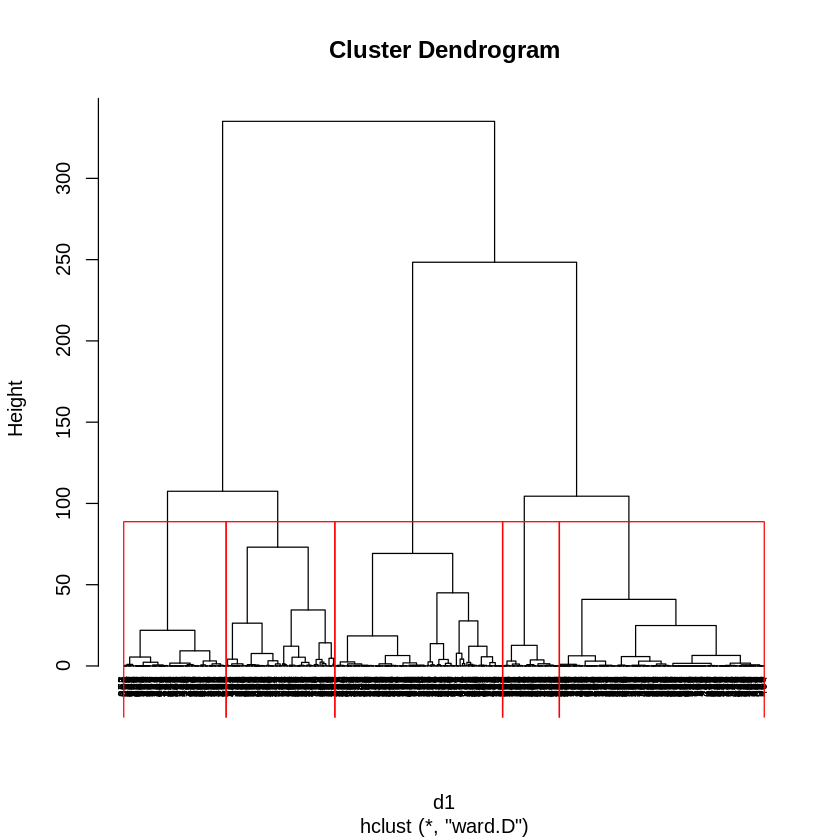

In [ ]:
# OR
# Ward Hierarchical Clustering
d1 <- dist(sub_z, method = "euclidean") # distance matrix, or distance
fit1 <- hclust(d1, method="ward")
plot(fit1, hang = -1, cex = 0.6) # display dendogram

#plot(fit1)

groups <- cutree(fit1, k=5) # cut tree into 5 clusters
# draw dendrogram with red borders around the 5 clusters
rect.hclust(fit1, k=5, border="red")

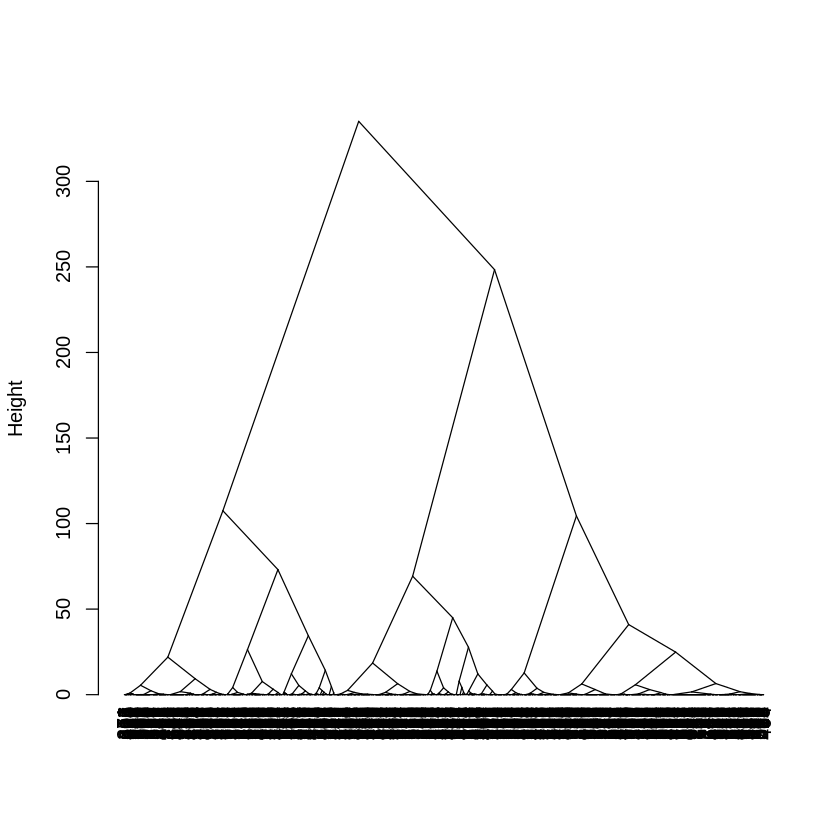

In [ ]:
# Convert hclust into a dendrogram and plot
hcd1 <- as.dendrogram(fit1)
# Default plot
plot(hcd1, type = "triangle", ylab = "Height")

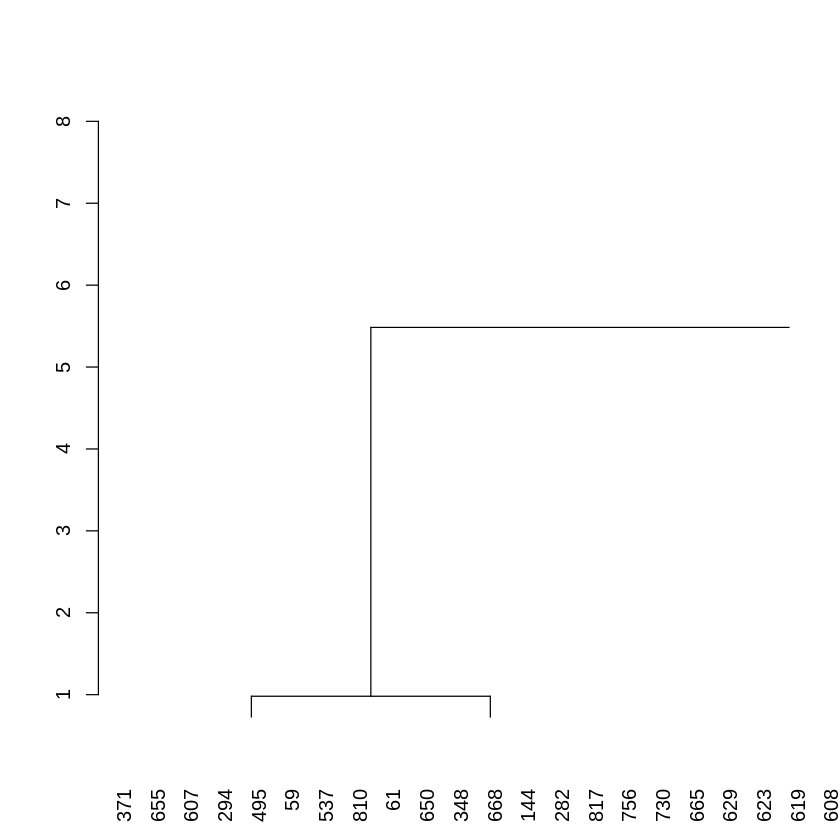

In [ ]:
# Zoom in to the first dendrogram
plot(hcd1, xlim = c(1, 20), ylim = c(1,8))

We can see the first cluster between store_id 495 and 668. We can proceed as such for the other dendrograms to identifying all the existing clusters in the data set.

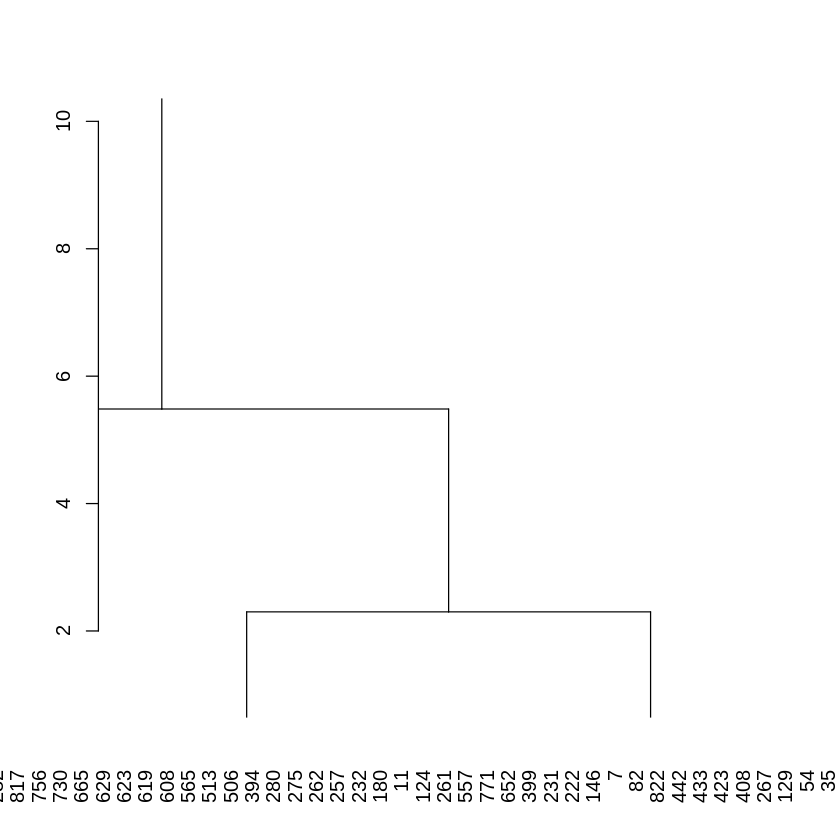

In [ ]:
# Zoom in to the second dendrogram, here 394 and 82
plot(hcd1, xlim = c(20, 50), ylim = c(1,10))

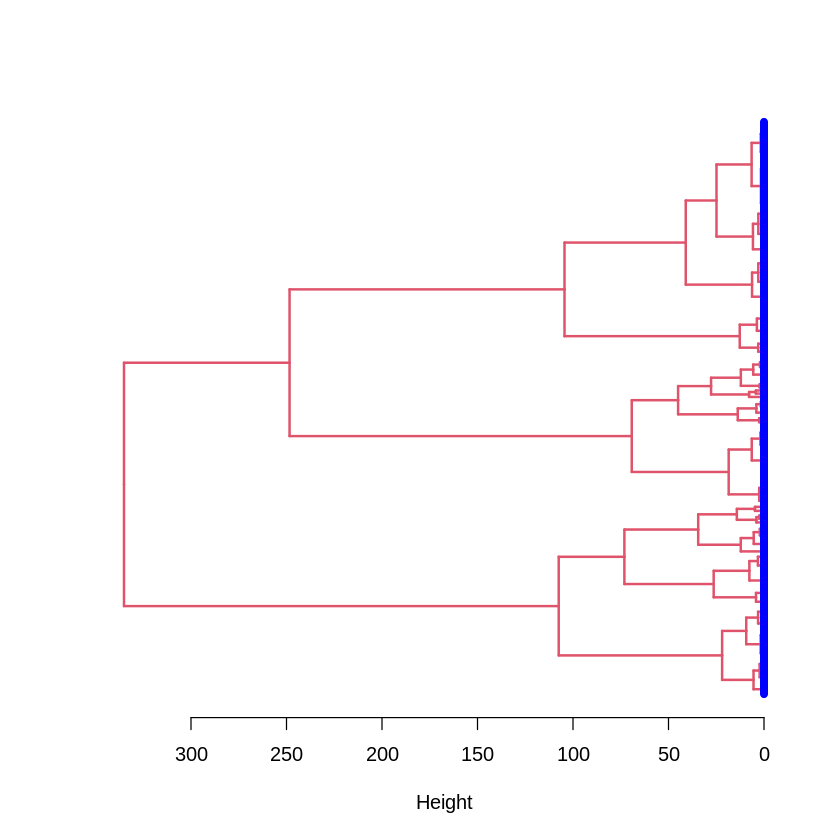

In [ ]:
# Define nodePar
nodePar <- list(lab.cex = 0.6, pch = c(NA, 19), 
                cex = 0.7, col = "blue")
# Customized vertical plot; remove labels
#plot(hcd1, ylab = "Height", nodePar = nodePar, leaflab = "none")

# Horizontal plot
plot(hcd1,  xlab = "Height",
     nodePar = nodePar, horiz = TRUE, leaflab = "none", edgePar = list(col = 2:3, lwd = 2:1))

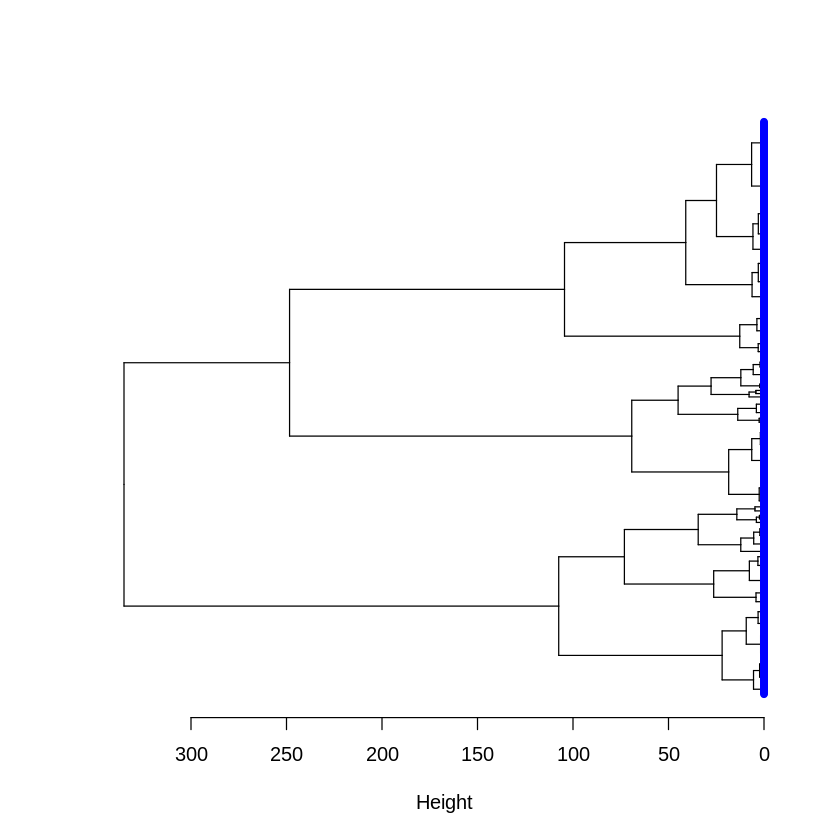

In [ ]:
# Horizontal plot
plot(hcd1,  xlab = "Height",
     nodePar = nodePar, horiz = TRUE, leaflab = "none")

In [ ]:
# Alternative visualizations

install.packages("ape")
#library("ape")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(ape)

# Default plot
#plot(as.phylo(hcd1), cex = 0.6, label.offset = 0.5)

ERROR: ignored

*Extract dendrogram plot data*

In [ ]:
install.packages("ggdendro")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
#library("ggplot2")
library(ggdendro)

In [ ]:
# Build dendrogram object from hclust results
dend <- as.dendrogram(hcd1)

# Extract the data (for rectangular lines)
# Type can be "rectangle" or "triangle"
dend_data <- dendro_data(dend, type = "rectangle")
# What contains dend_data
names(dend_data)

[1] "segments"    "labels"      "leaf_labels" "class"

In [ ]:
# Extract data for line segments
head(dend_data$segments)

x         y         xend      yend     
1 303.05069 335.07923 127.95528 335.07923
2 127.95528 335.07923 127.95528 107.47961
3 127.95528 107.47961  57.00754 107.47961
4  57.00754 107.47961  57.00754  21.92671
5  57.00754  21.92671  21.77240  21.92671
6  21.77240  21.92671  21.77240   5.48415

In [ ]:
# Extract data for line segments
head(dend_data$labels)

x y label
1 1 0 371  
2 2 0 655  
3 3 0 607  
4 4 0 294  
5 5 0 495  
6 6 0 59

In [ ]:
dend_df <- as.data.frame(dend_data)

ERROR: ignored

In [ ]:
write.csv(dend_data, "dend_data.csv")

ERROR: ignored

Warning message:
“Removed 56 rows containing missing values (geom_segment).”


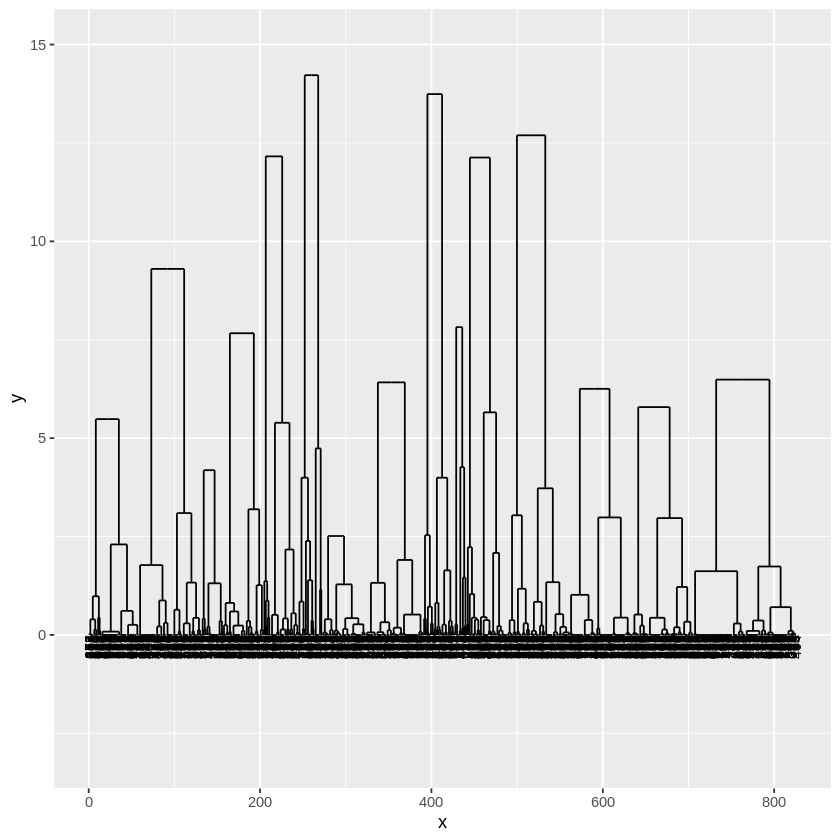

In [ ]:
# Plot line segments and add labels
p <- ggplot(dend_data$segments) + 
  geom_segment(aes(x = x, y = y, xend = xend, yend = yend))+
  geom_text(data = dend_data$labels, aes(x, y, label = label),
            hjust = 1, angle = 90, size = 3)+
  ylim(-3, 15)
print(p)

In [ ]:
install.packages("pvclust")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("mclust")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Package 'mclust' version 5.4.7
Type 'citation("mclust")' for citing this R package in publications.


Attaching package: ‘mclust’


The following object is masked from ‘package:purrr’:

    map


The following object is masked from ‘package:psych’:

    sim




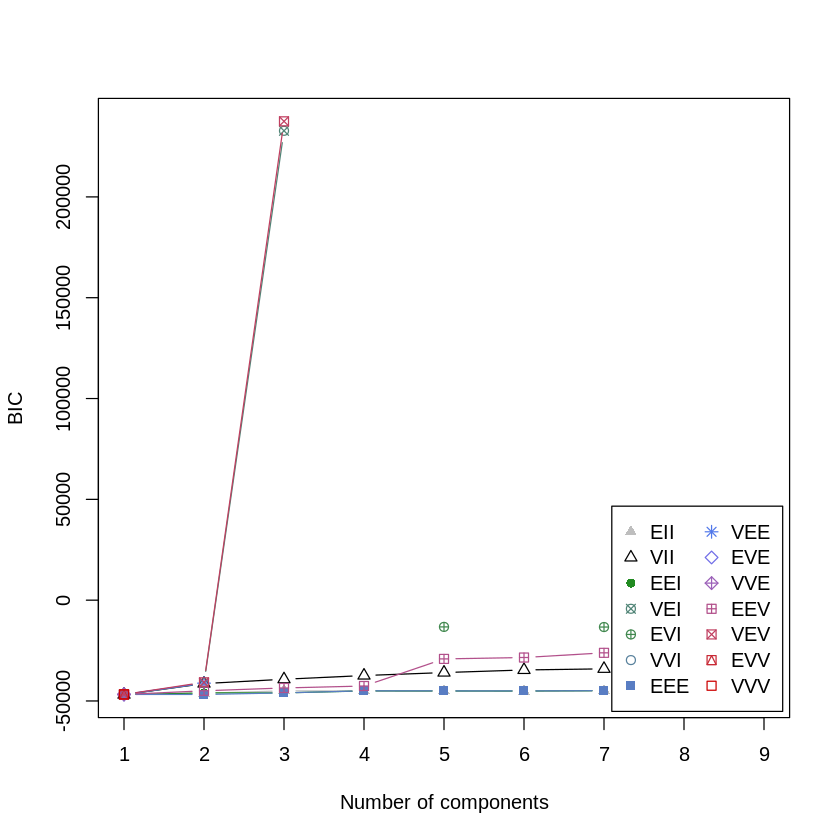

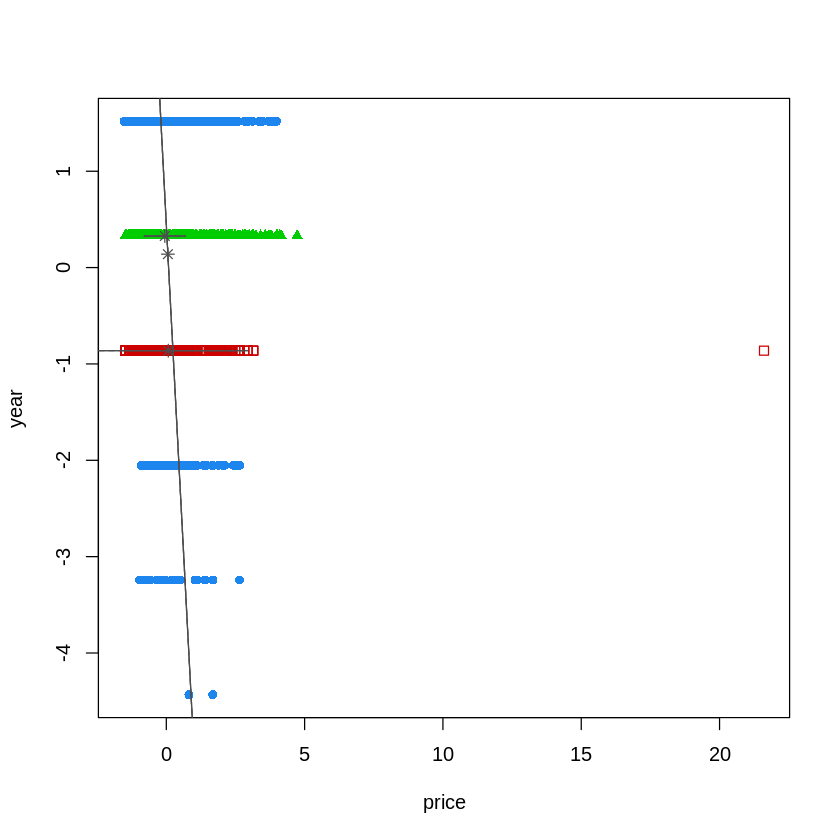

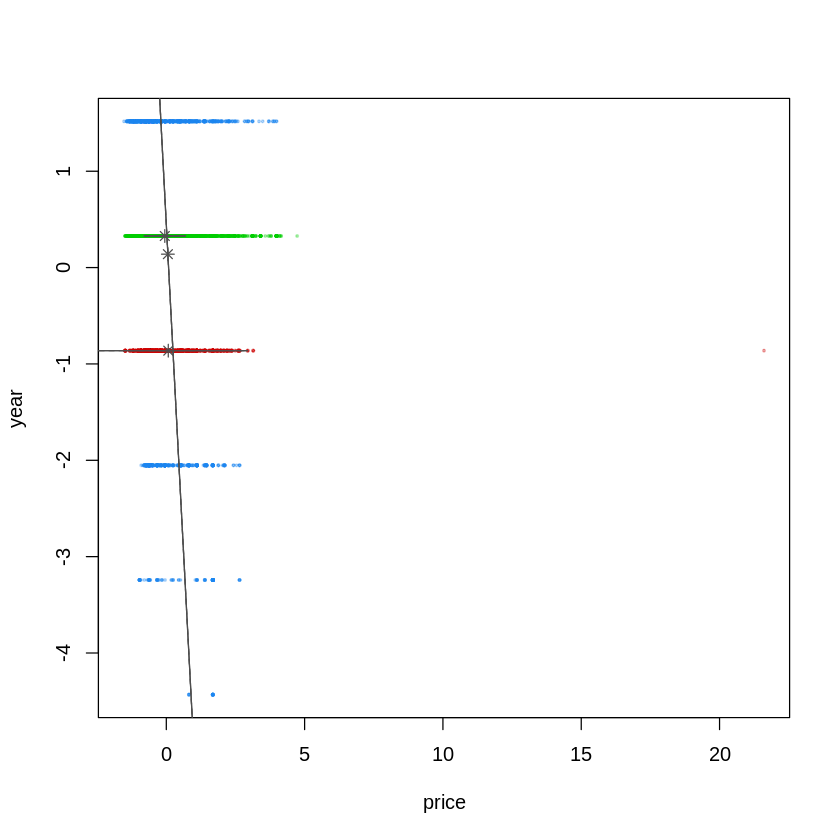

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust VEV (ellipsoidal, equal shape) model with 3 components: 

 log-likelihood    n df      BIC      ICL
       118808.2 8252 15 237481.2 237481.2

Clustering table:
   1    2    3 
1779 1990 4483 

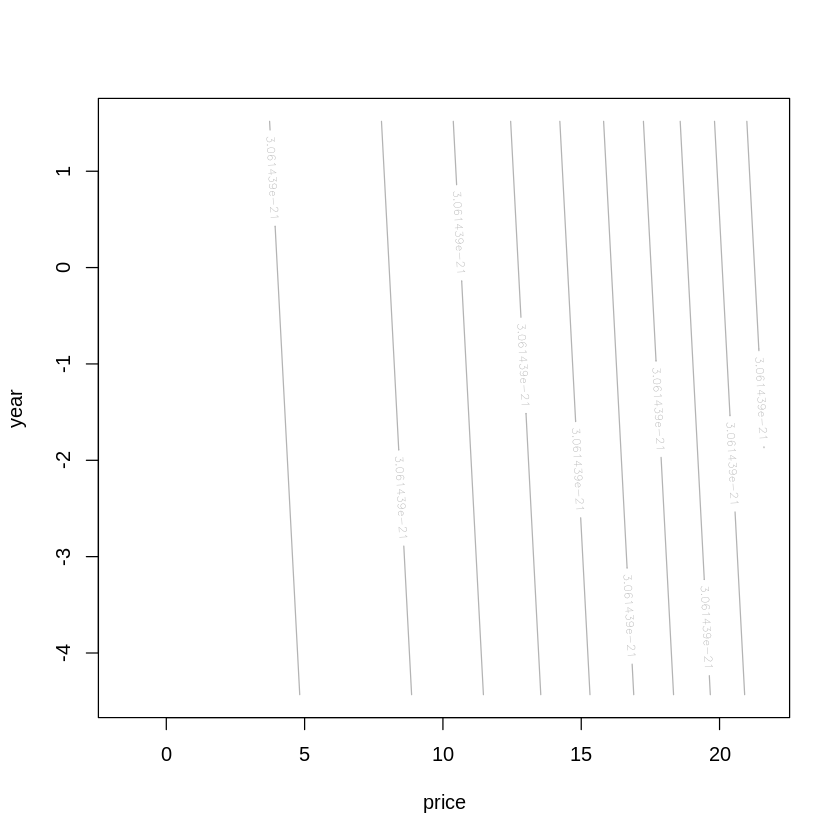

In [ ]:
# OR
# Model Based Clustering
library(mclust)

fit01 <- Mclust(df_z)

plot(fit01) # plot results

summary(fit01) # display the best model



```
---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust VEV (ellipsoidal, equal shape) model with 3 components:<br>

 log-likelihood    n df      BIC      ICL
       118808.2 8252 15 237481.2 237481.2

Clustering table:
   1    2    3 
1779 1990 4483

```



In [ ]:
# K-Means Clustering with 5 clusters
fit <- kmeans(mydata, 5)

# Cluster Plot against 1st 2 principal components

# vary parameters for most readable graph
library(cluster)
clusplot(mydata, fit$cluster, color=TRUE, shade=TRUE,
   labels=2, lines=0)

# Centroid Plot against 1st 2 discriminant functions
library(fpc)
plotcluster(mydata, fit$cluster)

In [ ]:
library(ggplot2)


Attaching package: ‘ggplot2’


The following objects are masked from ‘package:psych’:

    %+%, alpha




In [ ]:
# ggplot dendogram
dg <- ggplot(distance, aes(distance))

dg + theme_classic()

ERROR: ignored

### K-Means clustering

[source](https://uc-r.github.io/kmeans_clustering)

In [ ]:
#sub_xbox360_clean <- na.omit(sub_xbox360)

This error occurs also due to non numeric values present in the table. Kmeans cannot handle data that has NA or NAN values, which is the case in our data frame. The mean and variance are then no longer well defined, and we don't know anymore which center is closest.<br>

A work around could be to focus only on the numerical variables.

In [ ]:
# 
k2 <- kmeans(na.omit(sub_xbox360),4) # into 3 cluster

str(k2)

List of 9
 $ cluster     : Named int [1:82520] 4 4 4 3 3 2 4 1 1 2 ...
  ..- attr(*, "names")= chr [1:82520] "1" "2" "3" "4" ...
 $ centers     : num [1:4, 1:2] 164.38 291.06 681.75 449.62 2.49 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:4] "1" "2" "3" "4"
  .. ..$ : chr [1:2] "sub_xbox360.price" "fit.cluster"
 $ totss       : num 2.48e+09
 $ withinss    : num [1:4] 5.79e+07 3.81e+07 2.16e+08 4.69e+07
 $ tot.withinss: num 3.59e+08
 $ betweenss   : num 2.12e+09
 $ size        : int [1:4] 34734 22570 7445 17771
 $ iter        : int 2
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"


In [ ]:
print(k2)

K-means clustering with 3 clusters of sizes 45799, 26976, 9745

Cluster means:
      [,1]
1 186.2243
2 388.9364
3 648.9522

Clustering vector:
    [1] 2 2 2 3 3 1 2 1 1 2 2 1 2 2 1 1 1 3 2 2 1 1 1 3 1 1 1 1 1 1 2 1 1 3 2 1
   [37] 1 1 2 1 2 3 1 1 1 1 1 1 1 1 1 1 2 1 2 2 1 1 1 1 1 2 1 2 1 2 1 1 1 2 2 2
   [73] 2 1 1 2 1 2 1 1 2 1 1 2 1 2 2 2 1 1 1 1 1 1 2 1 1 1 2 2 1 3 3 2 1 1 3 1
  [109] 1 3 2 1 1 1 1 1 1 3 1 2 2 1 1 1 2 1 3 1 1 1 1 1 3 1 1 1 3 1 2 3 2 1 1 1
  [145] 1 1 3 3 1 1 1 2 1 1 3 3 1 1 1 1 2 2 1 1 1 1 1 2 2 1 2 1 1 1 1 1 1 2 1 1
  [181] 1 1 1 1 3 1 1 1 1 1 2 2 2 1 2 2 1 2 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 3 1 1
  [217] 3 1 2 1 2 1 1 1 3 1 2 2 1 1 3 2 2 2 3 1 1 1 1 1 3 3 1 3 1 1 3 2 1 1 2 1
  [253] 2 3 1 1 1 2 3 1 3 1 3 1 2 1 1 1 1 1 2 1 1 1 1 2 1 3 1 3 2 2 1 3 1 1 1 2
  [289] 1 2 3 3 1 2 2 2 2 1 2 2 1 1 2 1 2 2 1 2 2 2 1 1 2 1 1 1 3 2 1 1 3 1 1 2
  [325] 1 2 2 2 2 2 2 2 1 2 1 1 1 1 1 3 3 1 2 1 1 1 1 1 1 1 3 1 2 1 1 2 1 3 1 1
  [361] 2 1 1 3 2 1 1 1 1 1 2 1 2 1 1 1 1 1 1 2 3 3 1 2 2

In [ ]:
install.packages("corrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(corrplot)

corrplot 0.84 loaded



In [ ]:
num.col <- sapply(sub_xbox360, is.numeric)

In [ ]:
tail(num.col,3)

number_of_store_per_product_and_day              total_days_for_product 
                               TRUE                                TRUE 
         total_products_in_category 
                               TRUE

In [ ]:
cor.data <- cor(sub_xbox360[, num.col])

ERROR: ignored

In [ ]:
#fviz_cluster(k2, data = sub_xbox360)

**Elbow method**
[source](https://uc-r.github.io/kmeans_clustering)

In [ ]:
# Determine and plot the optimal number of clusters

# function to compute total within-cluster sum of square 
wss <- (nrow(sub_xbox360)-1)*sum(apply(sub_xbox360,2,var))

# Compute and plot wss for k = 1 to k = 15
# extract wss for 2-15 clusters
for (i in 2:15) wss[i] <- sum(kmeans(sub_xbox360,
   centers=i)$withinss)

plot(1:15, wss, type="b", xlab="Number of Clusters K",
  frame = FALSE, ylab="Within-clusters sum of squares")

Warning message in FUN(newX[, i], ...):
“NAs introduced by coercion”
Warning message in FUN(newX[, i], ...):
“NAs introduced by coercion”
Warning message in FUN(newX[, i], ...):
“NAs introduced by coercion”
Warning message in FUN(newX[, i], ...):
“NAs introduced by coercion”
Warning message in storage.mode(x) <- "double":
“NAs introduced by coercion”


ERROR: ignored

In [ ]:
# K-Means Cluster Analysis
fit <- kmeans(sub_xbox360_clean$price, 5) # 5 cluster solution
# get cluster means
aggregate(sub_xbox360_clean$price,by=list(fit$cluster),FUN=mean)
# append cluster assignment
sub_xbox360_clean$price <- data.frame(sub_xbox360_clean$price, fit$cluster)

Group.1 x       
1 1       978.6013
2 2       177.1416
3 3       329.9976
4 4       638.6905
5 5       470.7435

ERROR: ignored

In [ ]:
tail(sub_xbox360, 3)

sub_xbox360.price fit.cluster
82518 249               4          
82519 249               4          
82520 399               5

In [ ]:
dim(sub_xbox360)

[1] 82520    14

In [ ]:
write.csv(sub_xbox360, "price_cluster.csv")

In [ ]:
kcl <- ggplot(sub_xbox360, aes(sub_xbox360.price, fit.cluster))


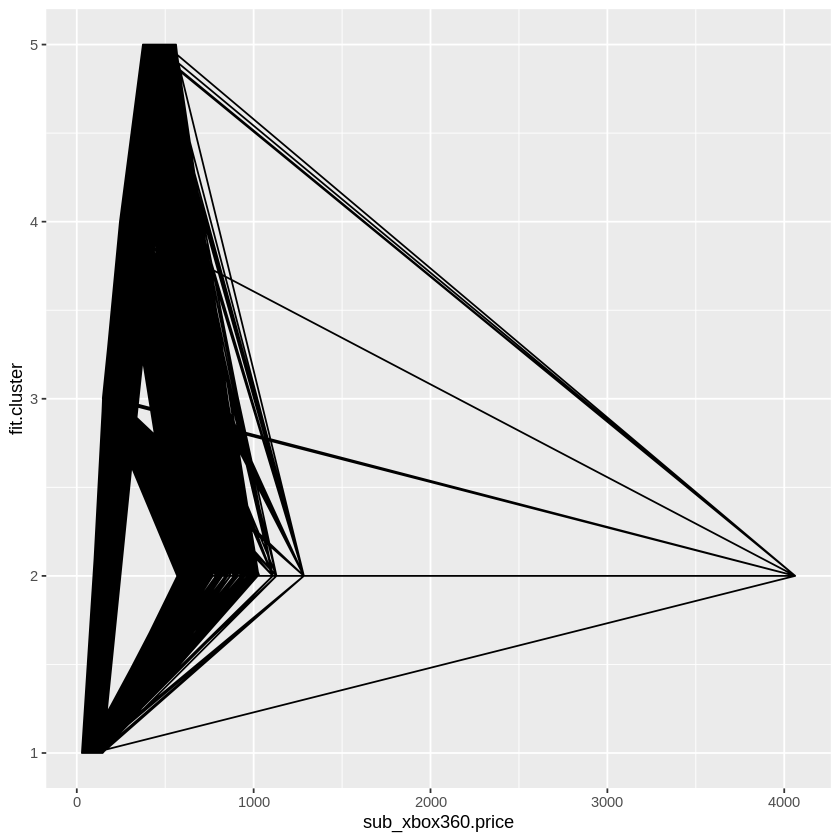

In [ ]:
kcl + geom_path(lineend = "butt", linejoin = "round", linemitre = 1)

#kcl + geom_count()

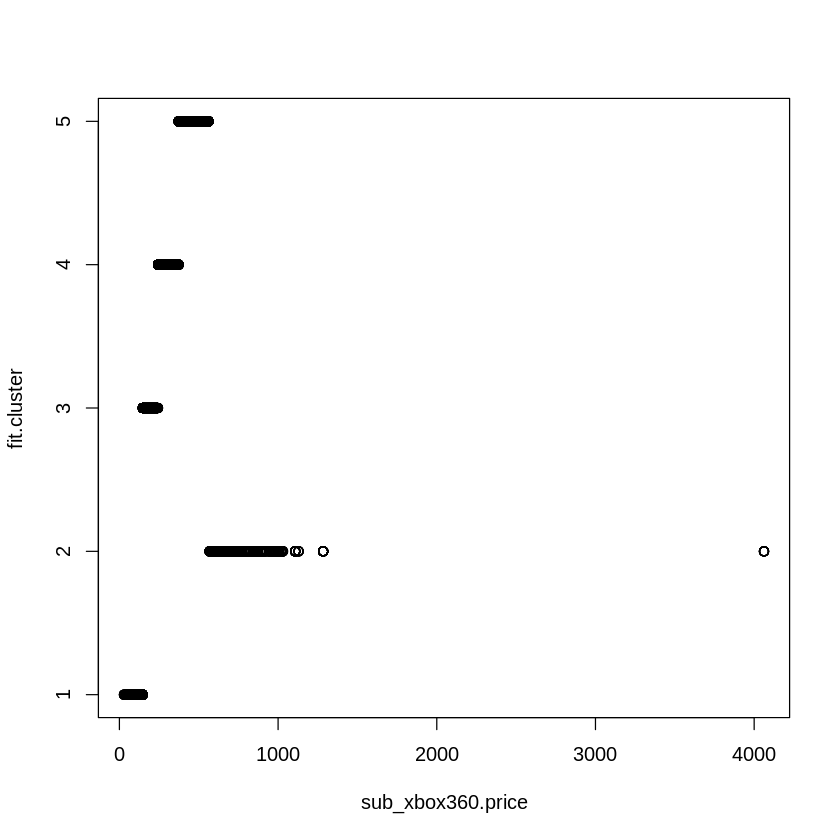

In [ ]:
plot(sub_xbox360)


In [ ]:
sub_xbox360 %>%
  mutate(Cluster = k2$cluster) %>%
  group_by(Cluster) %>%
  summarise_all("mean")

ERROR: ignored

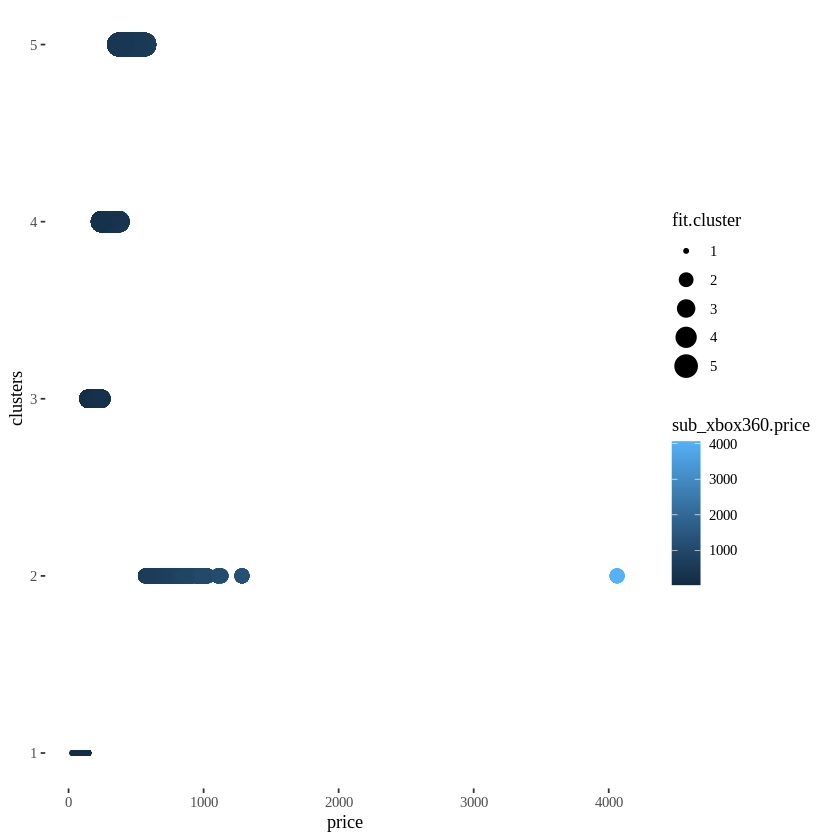

In [ ]:
kcl +
  geom_point(mapping = aes(x = sub_xbox360.price, y = fit.cluster, size = fit.cluster, colour = sub_xbox360.price)) +
  #scale_y_continuous(limits = c(0, 1500)) +
  #facet_wrap(~month) +
  scale_fill_gradient("Count", low = "grey", high = "blue")+
  theme_tufte() +
  xlab("price") +
  ylab("clusters") +
  #theme(axis.text.x = element_text(angle = 70)) +
  ggsave("k-cluster.png",width=6, height=4,dpi=300)

Don't know how to automatically pick scale for object of type data.frame. Defaulting to continuous.

ERROR while rich displaying an object: Error: Aesthetics must be either length 1 or the same as the data (82520): x

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepar

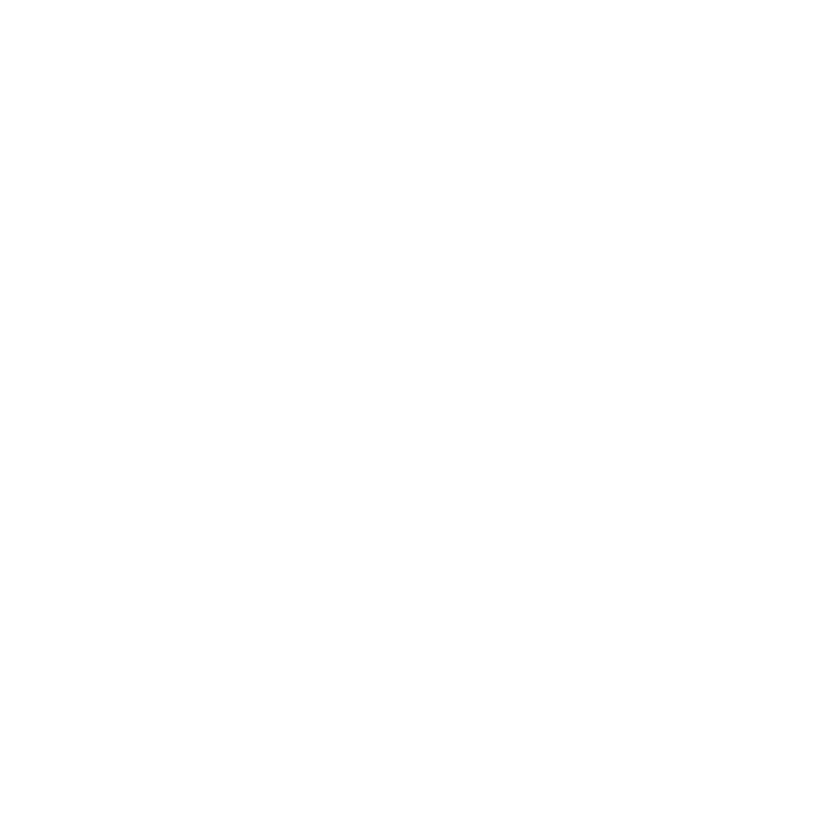

In [ ]:
kcl + geom_bar()

In [ ]:
head(k2, 3)

ERROR: ignored